# Final Project Submission
---

## Info

* Student name: **Barto Molina**
* Student pace: **part time**
* Scheduled project review date/time: **06/20/2019 4:30 PM (EST)**
* Instructor name: **Victor Geislinger**
* Blog post URL: 

## Imports

Load the required libraries that will be used throughout the rest of the project:

In [822]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

test = True

Load the dataset from [kc_house_data.csv](kc_house_data.csv):

In [823]:
df = pd.read_csv('kc_house_data.csv')

## Data / Project Summary

The column descriptions can be found in the [column_names.md](column_names.md) file.

Let's have a first look of the data by looking at the number of records, data types and the values of the first few rows of the dataset:

In [15]:
df.info()

# display all columns
pd.set_option('display.max_columns', 21)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         NaN   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933           NaN    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

Let's look at the first three columns of the data:

- id: unique identified for a house
- date: the date the house was sold
- price: this is our target variable


Let's find out what's the date range for the data and see if we can use the id column as the index for our dataset:

In [16]:
# date range
print(f"{df.date.max()} - {df.date.min()}")

9/9/2014 - 1/10/2015


In [17]:
# return the rows with a duplicated id (same property) and order by id
df[df.duplicated(['id'], keep=False)].sort_values(by='id').head()

id        date     price  bedrooms  bathrooms  sqft_living  \
2495     1000102   4/22/2015  300000.0         6       3.00         2400   
2494     1000102   9/16/2014  280000.0         6       3.00         2400   
16800    7200179  10/16/2014  150000.0         2       1.00          840   
16801    7200179   4/24/2015  175000.0         2       1.00          840   
11422  109200390  10/20/2014  250000.0         3       1.75         1480   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2495       9373     2.0         0.0   0.0          3      7        2400   
2494       9373     2.0         NaN   0.0          3      7        2400   
16800     12750     1.0         0.0   0.0          3      6         840   
16801     12750     1.0         0.0   0.0          3      6         840   
11422      3900     1.0         0.0   0.0          4      7        1480   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2495            0.0      1991           0.0    98002  47.3262 -122.214   
2494            0.0      1991           0.0    98002  47.3262 -122.214   
16800           0.0      1925           0.0    98055  47.4840 -122.211   
16801           0.0      1925           NaN    98055  47.4840 -122.211   
11422           0.0      1980           0.0    98023  47.2977 -122.367   

       sqft_living15  sqft_lot15  
2495            2060        7316  
2494            2060        7316  
16800           1480        6969  
16801           1480        6969  
11422           1830        6956

**Observations**

- The dataset contains 21,597 rows which represent houses sold in King County (Washington) from September, 2014 to October, 2015. The [current population](https://suburbanstats.org/population/washington/how-many-people-live-in-king-county) (total number of houses in KC in 2019) is 789,232, and given that the population hasn't increased significantly from 2015 to 2019, we can assume that we're working with a sample of around 3% of the total number of properties in KC (although whether that's the total number of sales during that period is unknown).

- `price` is the target variable. From the set of variables, we'll try to identify those with a higher influence over the price, which we'll use to build our model.

- The `id` column identifies each house, and not a sale record. Hence this might be useful in order to fill in incomplete data (those features that will be necessarily equal) and use this feature to test the validity of the date as a predictor.

## 1. Data Scrubbing

### First look at the dataset

Before we start the data scrubbing process by dealing with null values and data types, let's have a quick look at the scatter plot and histogram for all the variables. This will help us identify correlations between our features, determine the skeweness and curtosis and point to possible outliers

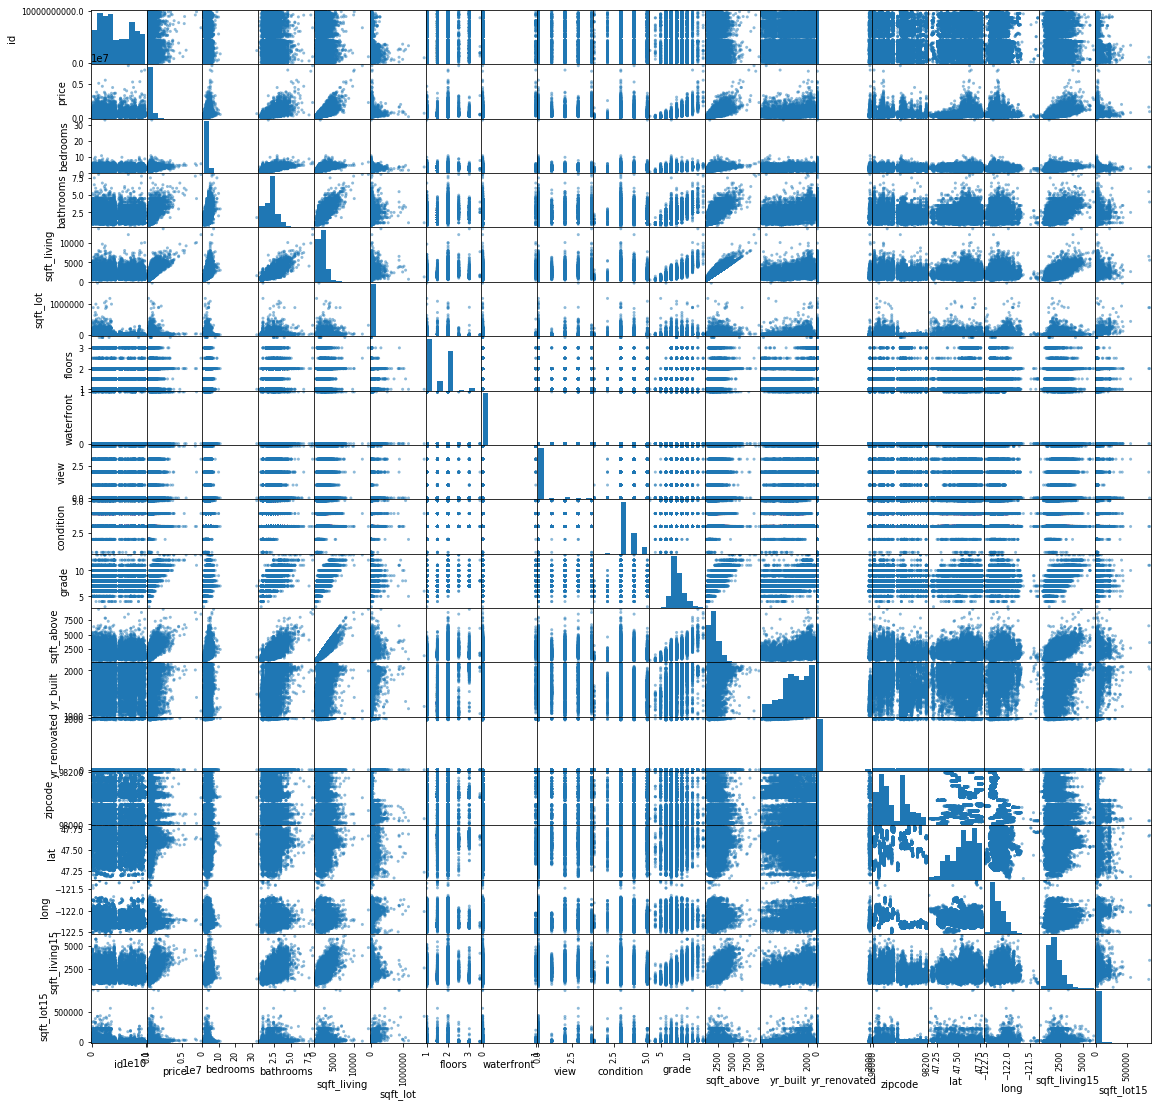

In [18]:
pd.plotting.scatter_matrix(df, figsize  = [19, 19]);

In [19]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [20]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**Observations**

1. Categorical data

From the scatter matrix above, we've identified the following features that can be considered as **categorical**:

- waterfront
- view
- condition
- grade

We'll consider `bedrooms` and `floors` as quantitative, assuming there's a mathematical relationship between the values on these columns, and will transform the rest of the columns into categories.

We'll also consider `zipcode` and the years (`yr_built` and `yr_renovated`) as categorical.

2. Null values

There are some columns with null values (`waterfront`, `view` and `yr_renovated`). For `waterfront` and `yr_renovated` this is number is relevant (around 10% of the data) and we'll need to decide how we handle them. As for the `view` column, we'll probably just drop those 63 records. We'll also need to look for placeholders.

3. Outliers and placeholders

From the summary table, we can note a couple of clear outliers on the max. values of the number of bedrooms (33) and the house footage / lot footage (13540 / 1651359) and a value of 0 in the `yr_renovated` which might be used as a placeholder

### Null values / placeholders and data types

After an initial exploration, we found that the `waterfront`, `view` and `yr_renovated` contain null values. Before dealing with them, we'll also check if there are values that may be used placeholders in any of the columns:

In [50]:
for column in df:
    print(column)
    print('-----------')
    print('describe:')
    print(df[column].describe())
    print('unique values:')
    print(df[column].unique())
    print('value counts:')
    print(df[column].value_counts(dropna = False).head())
    print('\n')

price
-----------
describe:
count    2.159600e+04
mean     5.402920e+05
std      3.673760e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64
unique values:
[221900. 538000. 180000. ... 541800. 610685. 402101.]
value counts:
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
Name: price, dtype: int64


bedrooms
-----------
describe:
count    21596.000000
mean         3.371828
std          0.904114
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64
unique values:
[ 3  2  4  5  1  6  7  8  9 11 10]
value counts:
3    9824
4    6882
2    2760
5    1601
6     272
Name: bedrooms, dtype: int64


bathrooms
-----------
describe:
count    21596.000000
mean         2.115843
std          0.768998
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max     

The following columns contain null values / placeholders:
- `waterfront`: 'nan' (2376)
- `view`: 'nan' (63)
- `sqft_basement`: '?' (454)
- `yr_renovated`: '0.0' (17011), 'nan' (3842)

We'll deal with the null values / placeholders for each of the columns individually:

#### Waterfront

Let's have a look at the Waterfront column. From the `value_counts`, we can see that the majority of the houses are not waterfront. There are many null values compared to the number of the houses that are waterfront:

In [22]:
df.waterfront.value_counts(dropna=False)

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64

 We might assume that these houses are not waterfront but first, let's compare the price for all the categories with box plots:

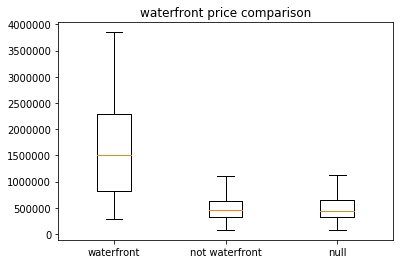

In [23]:
# show a box plot with the three categories of waterfront: 1, 0, null
wf_prices = []
wf_prices.append(df[df['waterfront'] == 1.0].price)
wf_prices.append(df[df['waterfront'] == 0.0].price)
wf_prices.append(df[df['waterfront'].isna()].price)

plt.title('waterfront price comparison')
plt.boxplot(wf_prices, labels=['waterfront', 'not waterfront', 'null'], showfliers=False);

Indeed, it seems that the price of the waterfront houses is higer than the one that are not facing the river. The null values seem to correspond to houses that are not facing the river.

In [824]:
# replace the null values in the waterfront column with '0'
df['waterfront'].fillna(0, inplace=True)

#### View

This column indicates if the house has been viewed. It's not clear what this column represents, but we'll assume that is the number of times a house has been viewed by a buyer before closing the transaction. Following a similar approach as with the `waterfront` column, we're going to see if theres any difference between the values in this column in relation with the price using box plots:

In [25]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

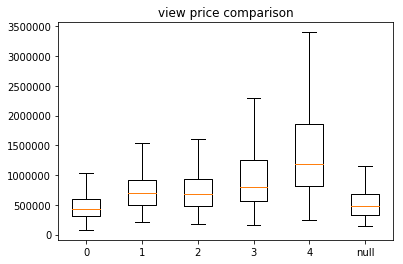

In [26]:
# show a box plot with the six categories of view: 0, 1, 2, 3, 4, null
vw_prices = []
vw_prices.append(df[df['view'] == 0.0].price)
vw_prices.append(df[df['view'] == 1.0].price)
vw_prices.append(df[df['view'] == 2.0].price)
vw_prices.append(df[df['view'] == 3.0].price)
vw_prices.append(df[df['view'] == 4.0].price)
vw_prices.append(df[df['view'].isna()].price)

plt.title('view price comparison')
plt.boxplot(vw_prices, labels=['0', '1', '2', '3', '4', 'null'], showfliers=False);

We can assume that the null values correspond to houses that have not been viewed.

In [825]:
# replace the null values in the waterfront column with '0'
df['view'].fillna(0, inplace=True)

#### Basement footage 

Let's investigate if there's any relationship between the different `square footage` columns:

In [28]:
# create a new dataframe that contains all the sqft related columns
cols = [col for col in df.columns if 'sqft' in col]
df_sqft = df[cols].copy()

df_sqft[df['sqft_basement'] != '?'].head(10)

sqft_living  sqft_lot  sqft_above sqft_basement  sqft_living15  sqft_lot15
0          1180      5650        1180           0.0           1340        5650
1          2570      7242        2170         400.0           1690        7639
2           770     10000         770           0.0           2720        8062
3          1960      5000        1050         910.0           1360        5000
4          1680      8080        1680           0.0           1800        7503
5          5420    101930        3890        1530.0           4760      101930
7          1060      9711        1060           0.0           1650        9711
8          1780      7470        1050         730.0           1780        8113
9          1890      6560        1890           0.0           2390        7570
10         3560      9796        1860        1700.0           2210        8925

It seems that the `sqft_basement` is actually the difference between the `sqft_living` and the `sqft_above` columns. Let's verify:

In [51]:
# all the houses with a basement
df_basement = df_sqft[df_sqft['sqft_basement'] != '?'].copy()

# create a calculated basement sqft column as sqft_living - sqft_above
df_basement['sqft_basement_calculated'] = df_basement['sqft_living'] - df_basement['sqft_above']

In [52]:
# convert the 'sqft_basement' column to int and check if the calculate values match the actual existing values
df_basement['sqft_basement'] = pd.to_numeric(df_basement['sqft_basement'], downcast='integer')

# compare calculated and actual values
(df_basement['sqft_basement'] == df_basement['sqft_basement_calculated']).all()

True

They match! For now, we'll just assume that the sqft_basement is just the difference between the `sqft_living` and the `sqft_above`. We'll convert the `sqft_basement` into int and then we'll fill in the nulls with the calculated value:

In [826]:
df['sqft_basement'].replace('?', np.nan, inplace=True)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], downcast='integer')
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

We suspect that these columns will present some type of correlation and we'll need to drop some of them.

#### Year renovated

The `yr_renovated = 0` may indicate that the house has never been renovated, and we could assume that the null values also indicate that the house is not renovated. Same as with the `waterfront` and the `view` coulmns, let's inpect the relationship with the target value using box plots:

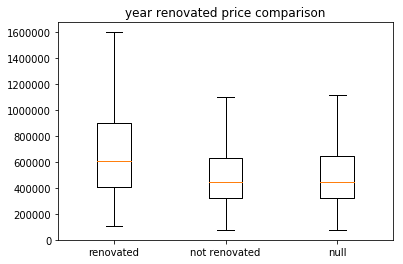

In [32]:
# show a box plot with the three categories of yr_renovated: 0, null, renovated
rn_prices = []
rn_prices.append(df[(df['yr_renovated'] != 0.0) & (df['yr_renovated'].notna())].price)
rn_prices.append(df[df['yr_renovated'] == 0.0].price)
rn_prices.append(df[df['yr_renovated'].isna()].price)

plt.title('year renovated price comparison')
plt.boxplot(rn_prices, labels=['renovated', 'not renovated', 'null'], showfliers=False);

Also in this case we can assume that both the null values and '0' correspond to houses that haven't been renovated, and we'll convert the '0' values into nulls:

In [827]:
# replace the null values in the yr_renovated column with '0'
df['yr_renovated'].replace(0, np.nan, inplace=True)

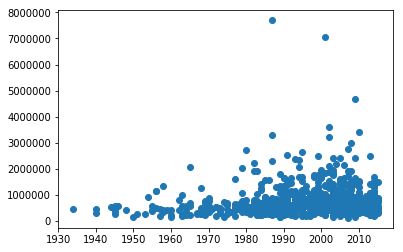

In [34]:
plt.scatter(df.yr_renovated, df.price);

#### Future work

- Fill in data based on duplicated ids (as it's the same house)
- Analize the date column

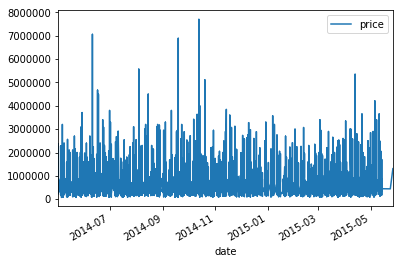

In [35]:
df['date'] = df['date'].astype('datetime64')
df.plot(x='date', y='price');

### Outliers

As discussed, we've identified some outliers in the `sqft_living` / `sqft_lot` and `bedrooms` columns. For now, we're going to remove the house with 33 bedrooms as it clearly seems related to an error during the data input:

In [36]:
df[df.bedrooms == 33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895 2014-06-25  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
15856      6000     1.0         0.0   0.0          5      7        1040   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
15856            580      1947           NaN    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15856           1330        4700

In [828]:
df = df[df.bedrooms != 33]

#### Future work

- investigate additional possible outliers: house footage / lot footage (13540 / 1651359 max)

### Multicollinearity

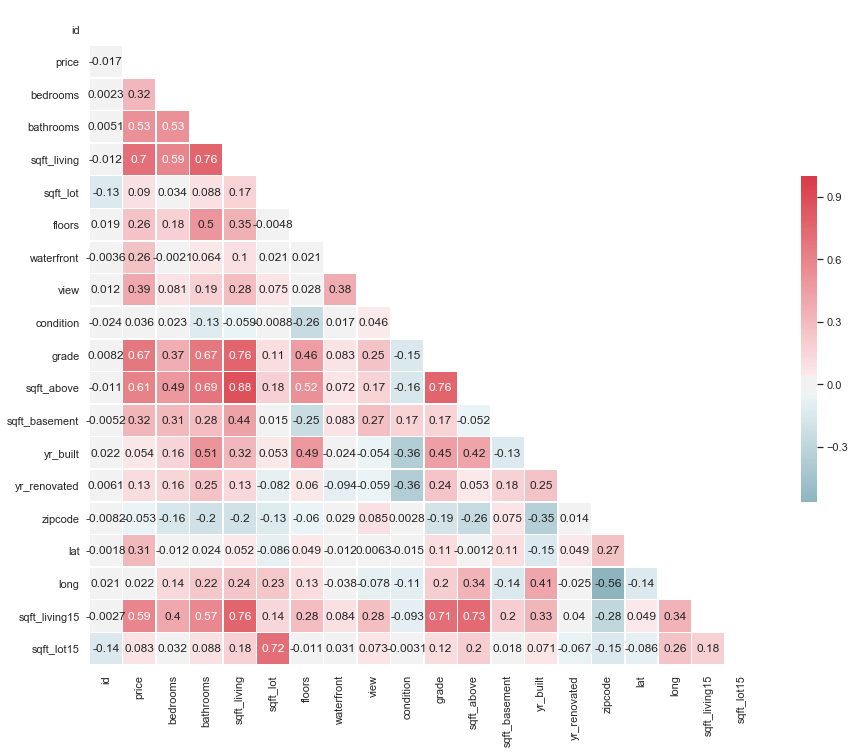

In [38]:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0, mask=mask, linewidths=.5, annot=True, cbar_kws={"shrink": .5});

From the heatmap above, it seems that there may be a high correlation between:
- `sqft_living` and `bathrooms`
- `sqft_living`, `sqft_above` and `sqft_living15`
- `sqft_lot` and `sqft_lot15`

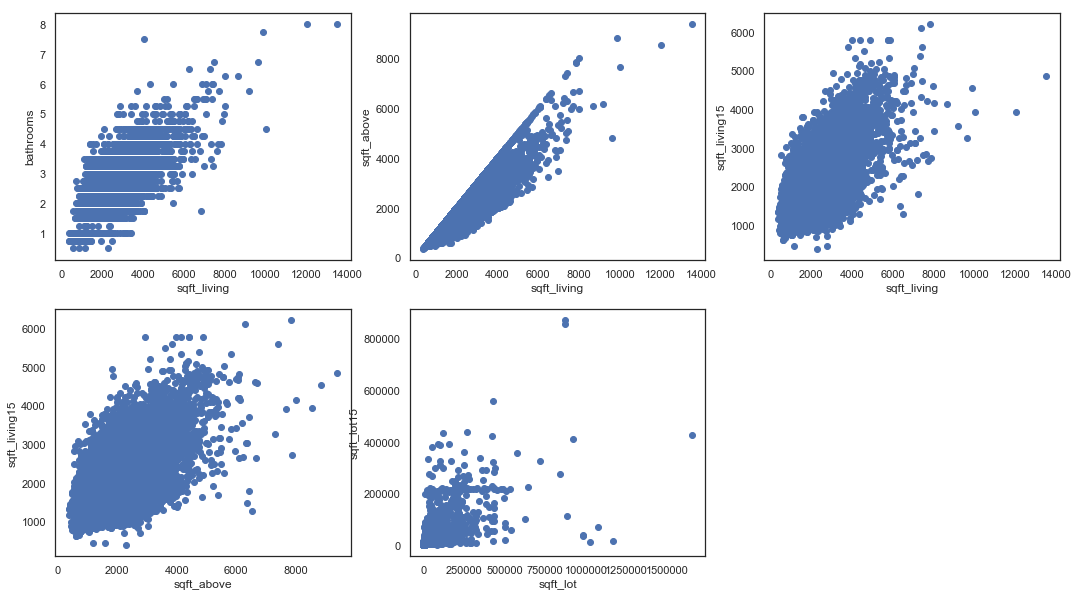

In [39]:
figure = plt.figure(figsize=(18, 10))
ax = figure.add_subplot(231)
ax2 = figure.add_subplot(232)
ax3 = figure.add_subplot(233)
ax4 = figure.add_subplot(234)
ax5 = figure.add_subplot(235)

ax.scatter(df['sqft_living'], df['bathrooms']);
ax.set_xlabel('sqft_living')
ax.set_ylabel('bathrooms')

ax2.scatter(df['sqft_living'], df['sqft_above']);
ax2.set_xlabel('sqft_living')
ax2.set_ylabel('sqft_above')

ax3.scatter(df['sqft_living'], df['sqft_living15']);
ax3.set_xlabel('sqft_living')
ax3.set_ylabel('sqft_living15')

ax4.scatter(df['sqft_above'], df['sqft_living15']);
ax4.set_xlabel('sqft_above')
ax4.set_ylabel('sqft_living15')

ax5.scatter(df['sqft_lot'], df['sqft_lot15']);
ax5.set_xlabel('sqft_lot')
ax5.set_ylabel('sqft_lot15')

plt.show()

As we suspected, there's a high correlation between the `sqft_living` and `sqft_above` columns. Also `sqft_living15` and `sqft_lot15` present some multicolliniarity.

We've decided to drop the `sqft_living` as it presents a high correlation with the rest of the columns. We'll also drop `sqft_living15` and `sqft_lot15`  which correlation with the target value is lower than the `sqft_above` and `sqft_lot` columns.

### Drop columns

Based on the investigations before, we're going to drop the following columns from the dataset:

- `id`, `date` and `view` as they won't provide relevant information for the model
- `sqft_living`, `sqft_living15` and `sqft_lot15` from the multicolliniarity test

In [829]:
df.drop(['id', 'date', 'view', 'sqft_living', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

### Categorical features / One-hot encoding

As discussed before, the following columns will be converted into categories, so we'll transform them into strings:

In [830]:
# convert into categorical
df_cat = df.copy()
for column in ['waterfront', 'condition', 'grade', 'yr_renovated', 'yr_built', 'zipcode']:
# condition as quantitative:
# for column in ['waterfront', 'grade', 'yr_renovated', 'yr_built', 'zipcode']:
    df_cat[column] = df_cat[column].astype('str')

In [831]:
# create dummy variables
df_cat = pd.get_dummies(df_cat)

# rename problematic 'waterfront' and 'yr_renovated' columns
for column in df_cat.columns:
    if '.0' in column:
        renamed = column.replace('.0', '')
        df_cat.rename(columns={column: renamed}, inplace=True)

### Model validation: split the data

In [832]:
y = df_cat[['price']]
X = df_cat.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Normalization

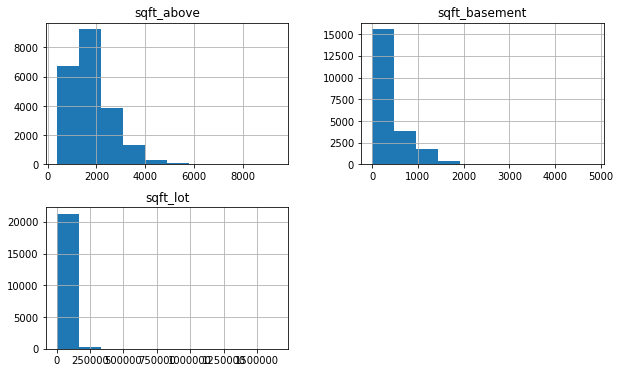

In [103]:
df[['sqft_above', 'sqft_basement', 'sqft_lot']].hist(figsize=(10,6));

Some columns present high positive skewness: `sqft_above`, `sqft_basement`, `sqft_lot` and the target variable `price`. We'll apply a log transformation to the former three for the time being:

In [833]:
# ignore SettingWithCopyWarning warnings
pd.set_option('mode.chained_assignment', None)

# apply transformations to train data
X_train['sqft_above'] = np.log(X_train['sqft_above'])
X_train['sqft_basement'] = np.log1p(X_train['sqft_basement'])
X_train['sqft_lot'] = np.log(X_train['sqft_lot'])
y_train['price'] = np.log(y_train['price'])

# apply transformations to test data
X_test['sqft_above'] = np.log(X_test['sqft_above'])
X_test['sqft_basement'] = np.log1p(X_test['sqft_basement'])
X_test['sqft_lot'] = np.log(X_test['sqft_lot'])
y_test['price'] = np.log(y_test['price'])

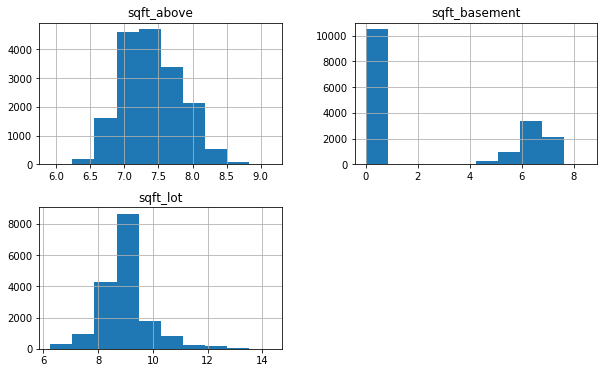

In [834]:
X_train[['sqft_above', 'sqft_basement', 'sqft_lot']].hist(figsize=(10,6));

## 2. EDA (Exploratory Data Analysis)

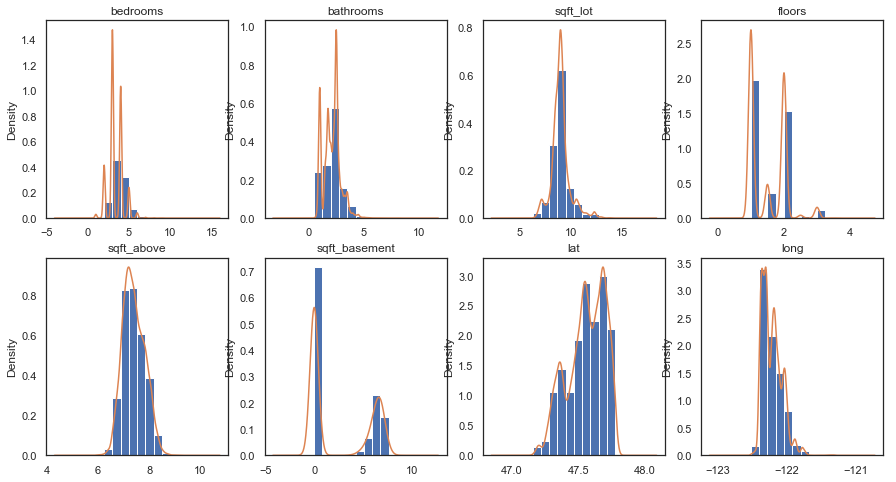

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,8))

for column in df_cat.iloc[:, 1:9].columns:
    i = df_cat.iloc[:, 0:9].columns.get_loc(column) - 1
    row = i//4
    col = i%4
    ax = axes[row, col]
    ax.hist(df_cat[column], density=True)
    df_cat[column].plot.kde(ax=ax)
    ax.set_title(column)
    
plt.show()

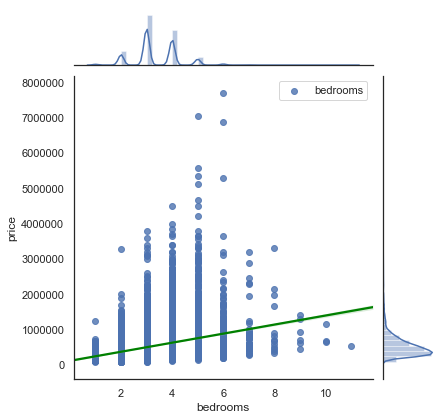

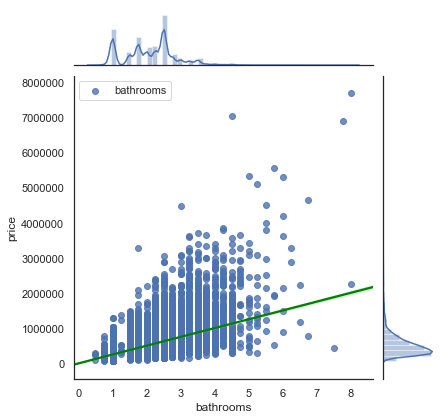

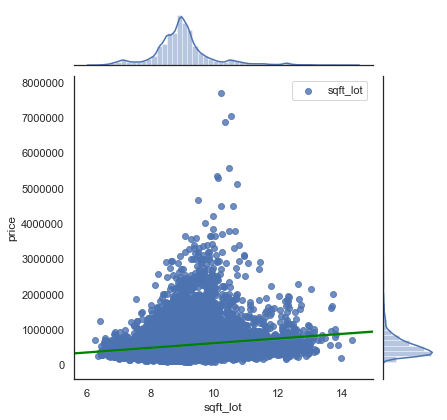

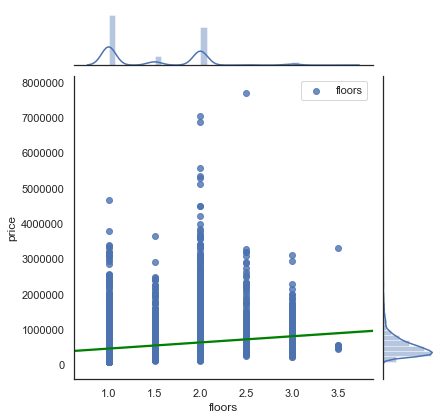

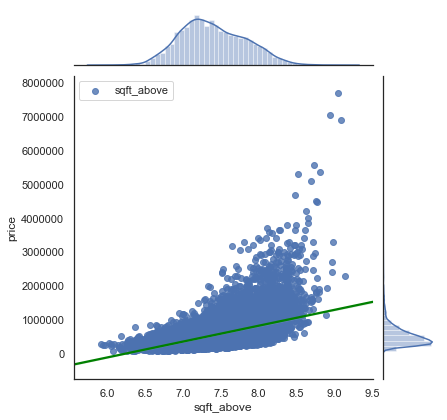

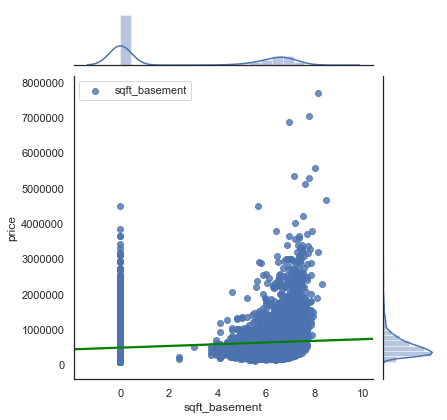

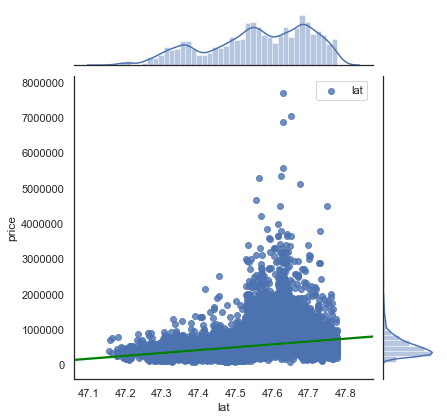

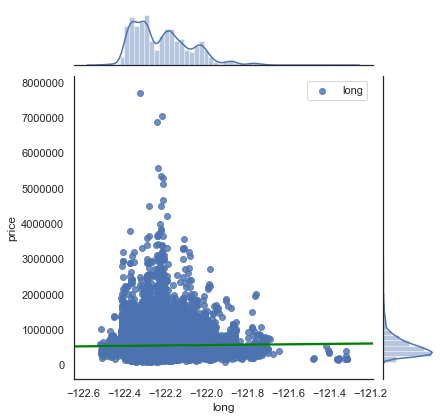

In [47]:
for column in df_cat.iloc[:, 1:9].columns:
    sns.jointplot(x=column, y='price',
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    plt.legend()
    plt.show()

## 3. Modeling

### Take 1

- **Quantitative features:** bedrooms, bathrooms, sqft_lot, floors, sqft_above, sqft_basement, lat, long
- **Categorical features:** waterfront, condition, grade, yr_renovated, yt_built, zipcode
- **Notes:** no normalization
- **Observatrions:** initial model

In [437]:
X_train = X_train.drop(['waterfront_0', 'condition_1', 'grade_3', 'yr_renovated_1944', 'yr_built_1900', 'zipcode_98002'],
                       axis=1)

In [438]:
predictors = sm.add_constant(X_train)
model = sm.OLS(y_train, predictors).fit()
model.summary()

# scikit learn
# linreg = LinearRegression()
# linreg.fit(predictors, y_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     307.1
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        01:01:10   Log-Likelihood:            -2.3065e+05
No. Observations:               17276   AIC:                         4.618e+05
Df Residuals:                   17002   BIC:                         4.640e+05
Df Model:                         273                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.661e+07   6.05e+06     -6.050      0.000   -4.85e+07   -2.48e+07
bedrooms          -1.724e+04   1797.206     -9.592      0.000   -2.08e+04   -1.37e+04
bathrooms          2.817e+04   2904.943      9.697      0.000    2.25e+04    3.39e+04
sqft_lot              0.2070      0.031      6.596      0.000       0.145       0.269
floors            -3.242e+04   3674.458     -8.823      0.000   -3.96e+04   -2.52e+04
sqft_above          177.6561      3.204     55.440      0.000     171.375     183.937
sqft_basement       133.7130      3.719     35.953      0.000     126.423     141.003
lat                1.667e+05   6.81e+04      2.446      0.014    3.31e+04       3e+05
long              -2.673e+05   4.95e+04     -5.397      0.000   -3.64e+05    -1.7e+05
waterfront_1       8.568e+05    1.5e+04     57.309      0.000    8.27e+05    8.86e+05
condition_2        1.138e+05   3.82e+04      2.980      0.003    3.89e+04    1.89e+05
condition_3        1.272e+05   3.59e+04      3.547      0.000    5.69e+04    1.97e+05
condition_4        1.516e+05   3.59e+04      4.226      0.000    8.13e+04    2.22e+05
condition_5        1.925e+05    3.6e+04      5.340      0.000    1.22e+05    2.63e+05
grade_10          -3.793e+06   6.05e+05     -6.265      0.000   -4.98e+06   -2.61e+06
grade_11          -3.594e+06   6.06e+05     -5.935      0.000   -4.78e+06   -2.41e+06
grade_12          -3.147e+06   6.05e+05     -5.199      0.000   -4.33e+06   -1.96e+06
grade_13          -1.986e+06   6.07e+05     -3.272      0.001   -3.18e+06   -7.96e+05
grade_4           -4.011e+06   6.05e+05     -6.625      0.000    -5.2e+06   -2.82e+06
grade_5           -4.056e+06   6.05e+05     -6.708      0.000   -5.24e+06   -2.87e+06
grade_6           -4.055e+06   6.05e+05     -6.701      0.000   -5.24e+06   -2.87e+06
grade_7           -4.039e+06   6.05e+05     -6.674      0.000   -5.23e+06   -2.85e+06
grade_8           -4.006e+06   6.05e+05     -6.618      0.000   -5.19e+06   -2.82e+06
grade_9           -3.925e+06   6.05e+05     -6.484      0.000   -5.11e+06   -2.74e+06
yr_built_1901     -1.552e+05   3.75e+04     -4.133      0.000   -2.29e+05   -8.16e+04
yr_built_1902     -7.741e+04   3.81e+04     -2.032      0.042   -1.52e+05   -2748.023
yr_built_1903     -7.058e+04   3.22e+04     -2.193      0.028   -1.34e+05   -7507.291
yr_built_1904     -4.867e+04    3.1e+04     -1.571      0.116   -1.09e+05     1.2e+04
yr_built_1905      4718.0197   2.85e+04      0.166      0.868   -5.11e+04    6.05e+04
yr_built_1906     -5.097e+04   2.64e+04     -1.928      0.054   -1.03e+05     855.274
yr_built_1907     -2.203e+04   2.87e+04     -0.766      0.443   -7.84e+04    3.43e+04
yr_built_1908     -7.851e+04    2.7e+04     -2.902      0.004   -1.32e+05   -2.55e+04
yr_built_1909     -1.939e+04   2.65e+04     -0.731      0.465   -7.14e+04

**Linear regression asumptions**

C:\Data\Python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


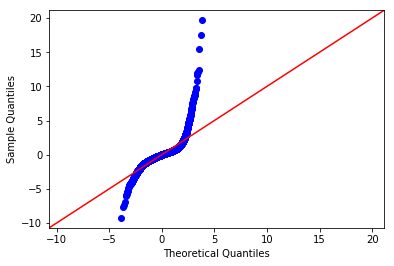

In [439]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### Take 2

- **Quantitative features:** bedrooms, bathrooms, sqft_lot, floors, sqft_above, sqft_basement, lat, long
- **Categorical features:** waterfront, condition, grade, yr_renovated, yt_built, zipcode
- **Notes:** log normalization: `price`, `sqft_above`, `sqft_basement`, `sqft_lot`
- **Observations:** $R^2$ decreased, I'll keep normalizing the features and target

In [489]:
X_train = X_train.drop(['waterfront_0', 'condition_1', 'grade_3', 'yr_renovated_1944', 'yr_built_1900', 'zipcode_98002'],
                       axis=1)

In [490]:
predictors = sm.add_constant(X_train)
model = sm.OLS(y_train, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     423.4
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        01:07:09   Log-Likelihood:                 4348.8
No. Observations:               17276   AIC:                            -8146.
Df Residuals:                   17000   BIC:                            -6005.
Df Model:                         275                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -60.8338      8.200     -7.419      0.000     -76.907     -44.761
bedrooms             -0.0036      0.002     -1.612      0.107      -0.008       0.001
bathrooms             0.0363      0.004     10.140      0.000       0.029       0.043
sqft_lot           7.352e-07   3.86e-08     19.050      0.000     6.6e-07    8.11e-07
floors               -0.0602      0.005    -13.196      0.000      -0.069      -0.051
sqft_above            0.0002   3.97e-06     61.180      0.000       0.000       0.000
sqft_basement         0.0002   4.63e-06     37.563      0.000       0.000       0.000
lat                   0.4652      0.085      5.468      0.000       0.298       0.632
long                 -0.4168      0.061     -6.848      0.000      -0.536      -0.298
waterfront_1          0.6442      0.018     35.148      0.000       0.608       0.680
condition_2           0.1014      0.040      2.525      0.012       0.023       0.180
condition_3           0.2267      0.037      6.174      0.000       0.155       0.299
condition_4           0.2787      0.037      7.582      0.000       0.207       0.351
condition_5           0.3345      0.037      9.036      0.000       0.262       0.407
grade_10              0.1919      0.192      1.000      0.317      -0.184       0.568
grade_11              0.2493      0.192      1.297      0.195      -0.127       0.626
grade_12              0.2694      0.193      1.394      0.163      -0.109       0.648
grade_13              0.2469      0.200      1.232      0.218      -0.146       0.640
grade_4              -0.4298      0.196     -2.196      0.028      -0.813      -0.046
grade_5              -0.4065      0.192     -2.119      0.034      -0.783      -0.030
grade_6              -0.2892      0.191     -1.510      0.131      -0.664       0.086
grade_7              -0.1377      0.191     -0.719      0.472      -0.513       0.238
grade_8              -0.0082      0.192     -0.043      0.966      -0.384       0.367
grade_9               0.1205      0.192      0.629      0.530      -0.255       0.496
yr_built_1901        -0.1133      0.044     -2.565      0.010      -0.200      -0.027
yr_built_1902        -0.0459      0.045     -1.019      0.308      -0.134       0.042
yr_built_1903        -0.1167      0.039     -3.004      0.003      -0.193      -0.041
yr_built_1904        -0.0531      0.039     -1.360      0.174      -0.130       0.023
yr_built_1905        -0.0043      0.034     -0.127      0.899      -0.070       0.061
yr_built_1906        -0.0429      0.031     -1.382      0.167      -0.104       0.018
yr_built_1907        -0.0203      0.036     -0.567      0.571      -0.091       0.050
yr_built_1908        -0.0975      0.032     -3.027      0.002      -0.161      -0.034
yr_built_1909        -0.0364      0.032     -1.146      0.252      -0.099

C:\Data\Python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


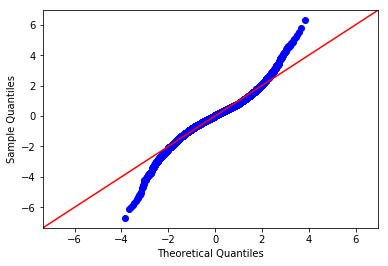

In [474]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

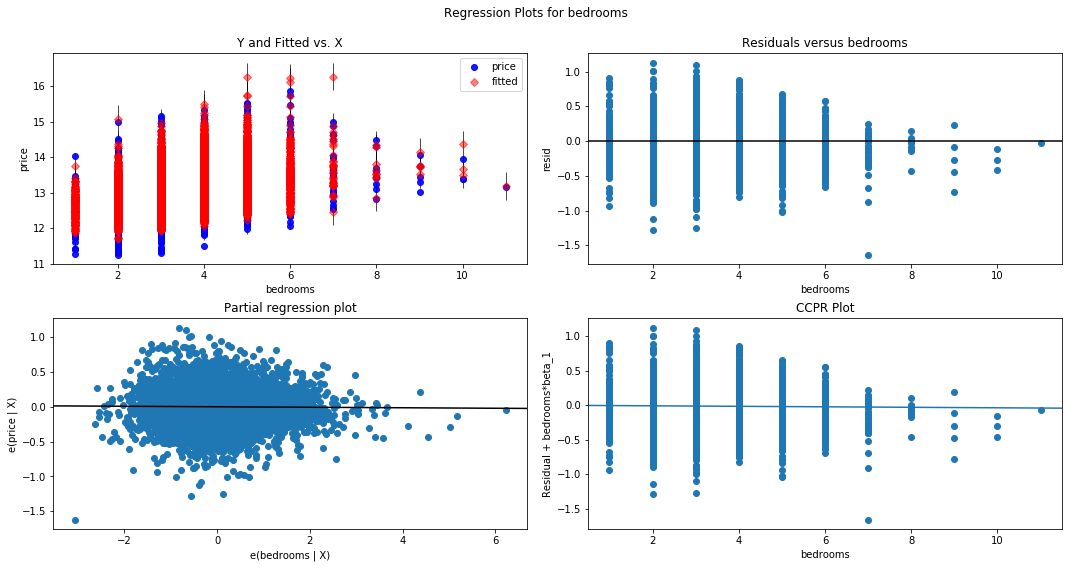

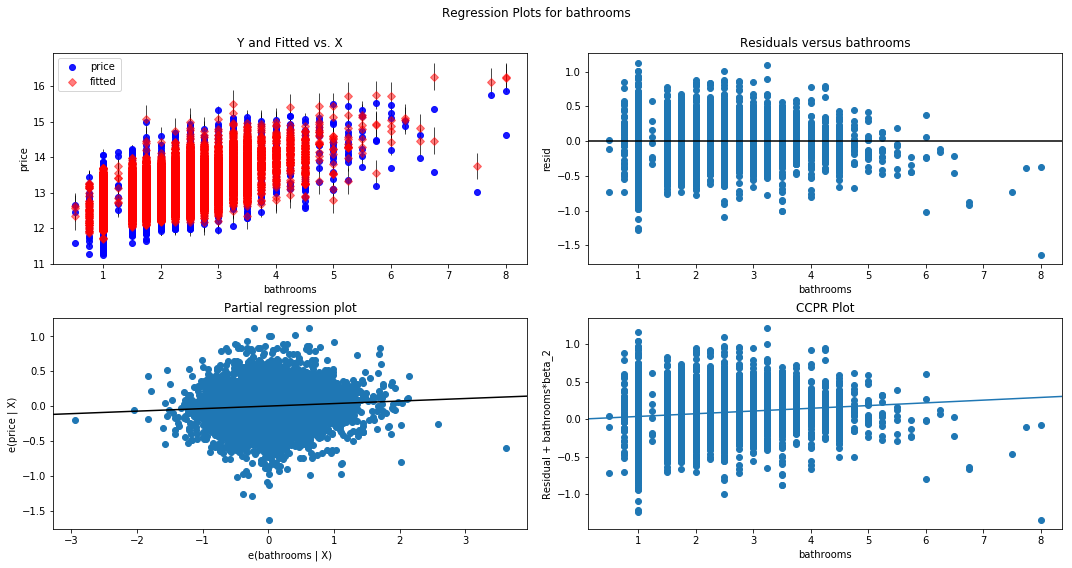

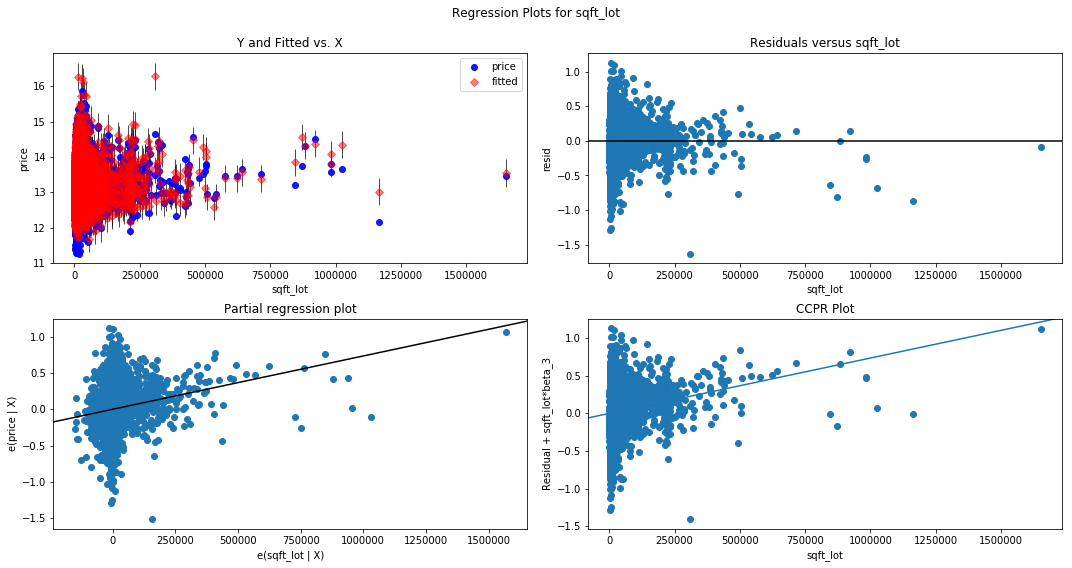

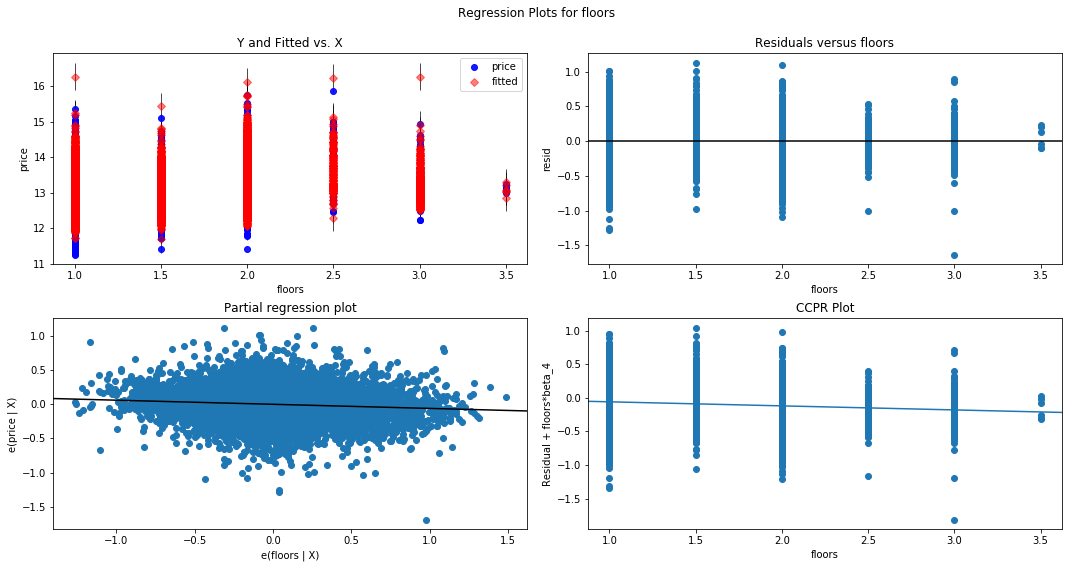

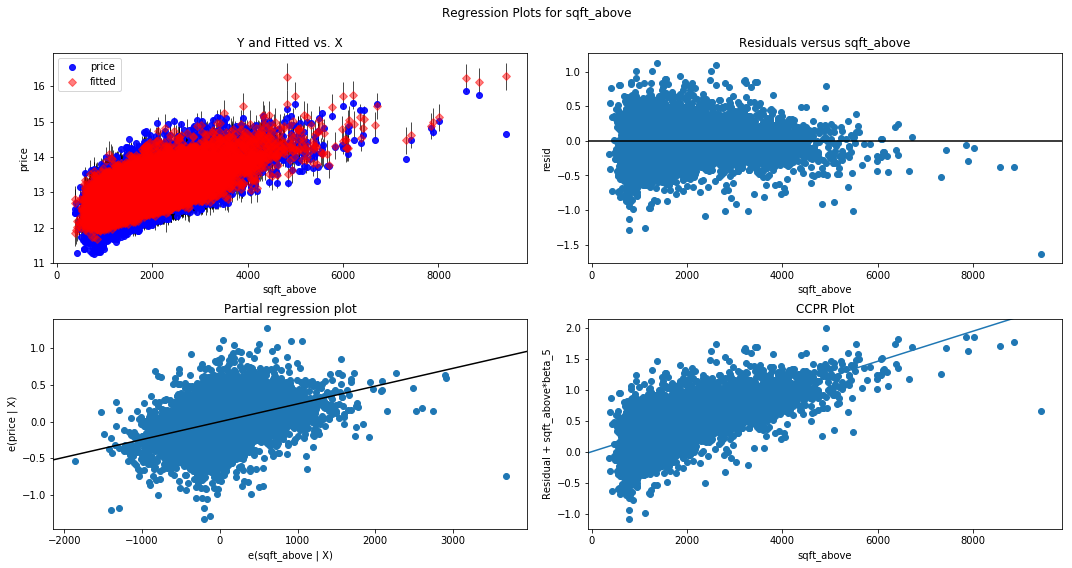

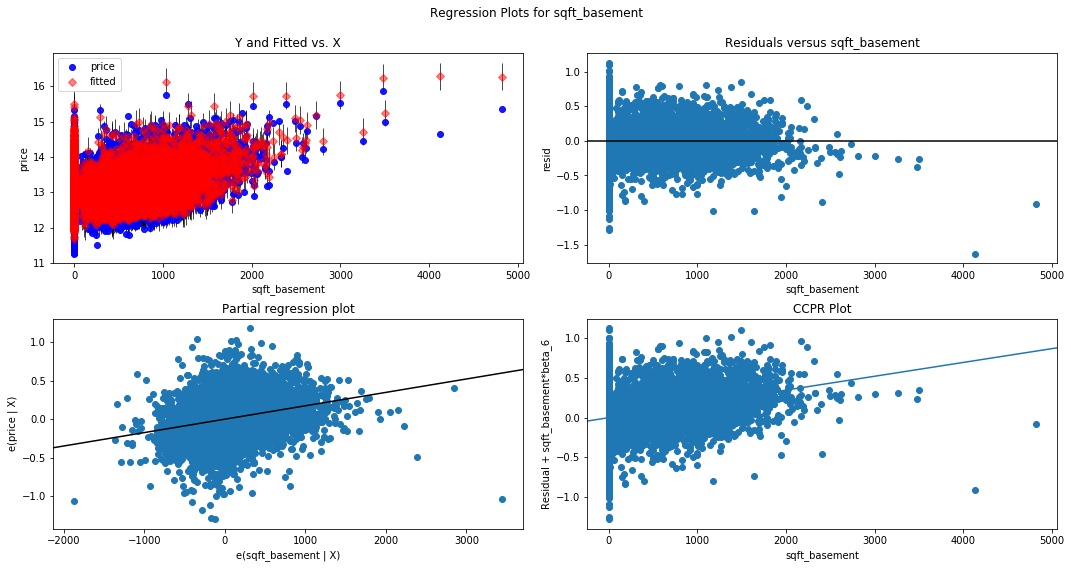

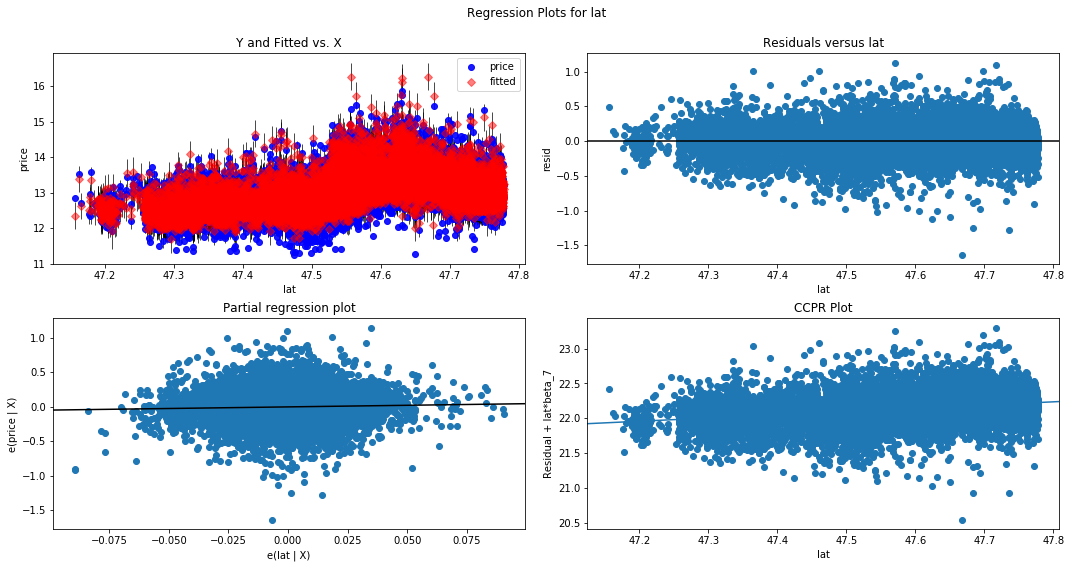

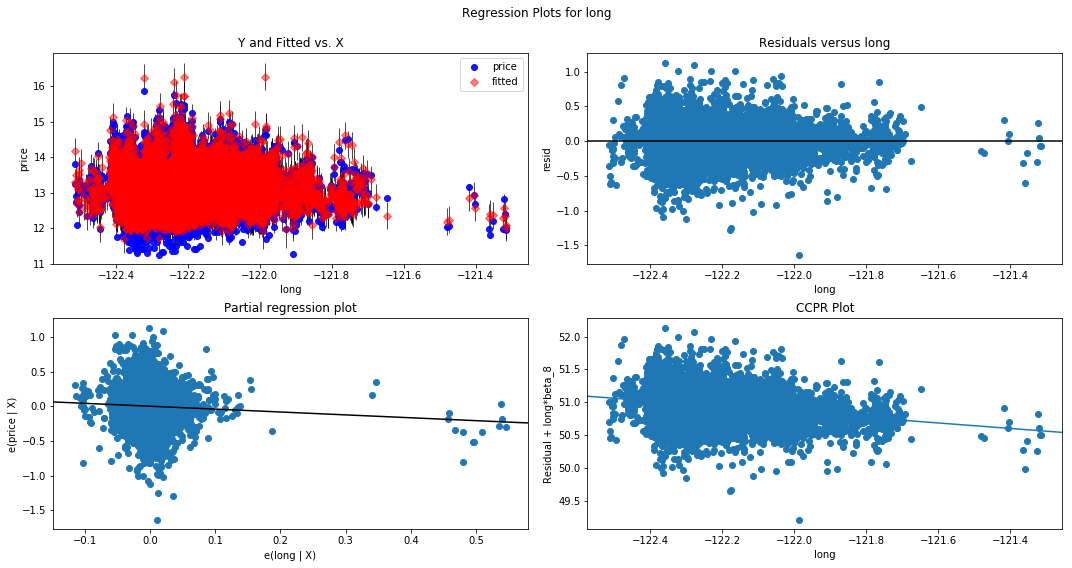

In [516]:
for col in ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'lat', 'long']:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.show()

### Take 3 - Best model

- **Quantitative features:** ~~bedrooms~~, bathrooms, sqft_lot, floors, sqft_above, sqft_basement, lat, long
- **Categorical features:** waterfront, condition, grade, yr_renovated, yt_built, zipcode
- **Notes:** log normalization: `price`, `sqft_above`, `sqft_basement`, `sqft_lot`
- **Observations:** $R^2$ decreased, I'll remove bedrooms from the predictors

In [687]:
X_train = X_train.drop(['bedrooms', 'waterfront_0', 'condition_1', 'grade_3', 'yr_renovated_1944', 'yr_built_1900', 'zipcode_98002'],
                       axis=1)

In [688]:
predictors = sm.add_constant(X_train)
model = sm.OLS(y_train, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     468.4
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        01:39:44   Log-Likelihood:                 4987.2
No. Observations:               17276   AIC:                            -9426.
Df Residuals:                   17002   BIC:                            -7301.
Df Model:                         273                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -82.3508      7.984    -10.314      0.000     -98.001     -66.701
bathrooms             0.0348      0.003     10.399      0.000       0.028       0.041
sqft_lot              0.0838      0.003     33.146      0.000       0.079       0.089
floors               -0.0511      0.005    -11.299      0.000      -0.060      -0.042
sqft_above            0.4431      0.007     60.987      0.000       0.429       0.457
sqft_basement         0.0226      0.001     37.440      0.000       0.021       0.024
lat                   0.5207      0.082      6.389      0.000       0.361       0.680
long                 -0.5417      0.059     -9.118      0.000      -0.658      -0.425
waterfront_1          0.6851      0.018     38.968      0.000       0.651       0.720
condition_2           0.1661      0.044      3.741      0.000       0.079       0.253
condition_3           0.3224      0.042      7.737      0.000       0.241       0.404
condition_4           0.3759      0.042      9.016      0.000       0.294       0.458
condition_5           0.4447      0.042     10.612      0.000       0.363       0.527
grade_10             -0.0169      0.185     -0.091      0.927      -0.379       0.346
grade_11              0.1116      0.185      0.602      0.547      -0.252       0.475
grade_12              0.2752      0.186      1.477      0.140      -0.090       0.640
grade_13              0.5459      0.194      2.810      0.005       0.165       0.927
grade_4              -0.5336      0.188     -2.832      0.005      -0.903      -0.164
grade_5              -0.5164      0.185     -2.791      0.005      -0.879      -0.154
grade_6              -0.4701      0.185     -2.547      0.011      -0.832      -0.108
grade_7              -0.3667      0.185     -1.986      0.047      -0.729      -0.005
grade_8              -0.2572      0.185     -1.392      0.164      -0.619       0.105
grade_9              -0.1252      0.185     -0.678      0.498      -0.488       0.237
yr_built_1901        -0.1106      0.044     -2.502      0.012      -0.197      -0.024
yr_built_1902        -0.1172      0.050     -2.335      0.020      -0.216      -0.019
yr_built_1903        -0.0734      0.038     -1.937      0.053      -0.148       0.001
yr_built_1904        -0.0395      0.038     -1.041      0.298      -0.114       0.035
yr_built_1905        -0.0133      0.033     -0.404      0.686      -0.078       0.051
yr_built_1906        -0.0570      0.031     -1.842      0.066      -0.118       0.004
yr_built_1907        -0.0046      0.034     -0.136      0.892      -0.071       0.062
yr_built_1908        -0.0651      0.032     -2.066      0.039      -0.127      -0.003
yr_built_1909        -0.0166      0.031     -0.540      0.589      -0.077       0.044
yr_built_1910        -0.0186      0.029     -0.644      0.519      -0.075

C:\Data\Python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


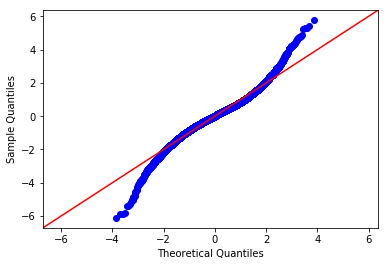

In [689]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

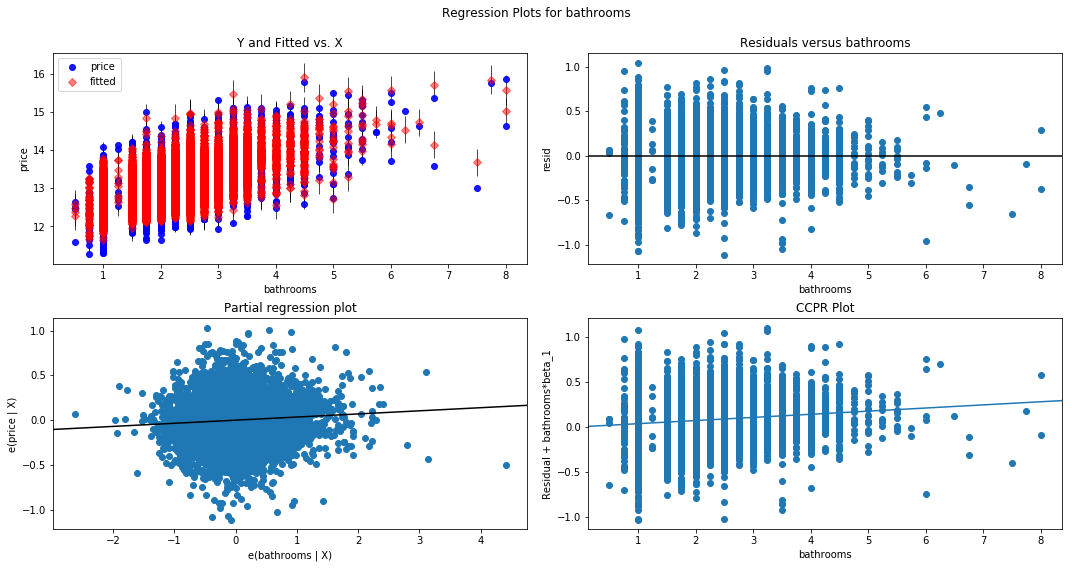

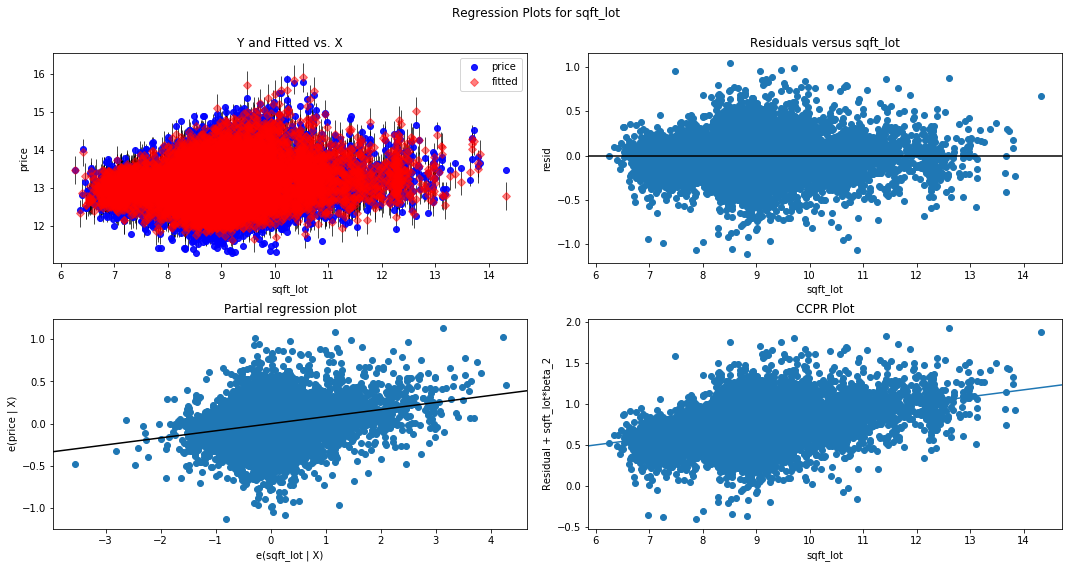

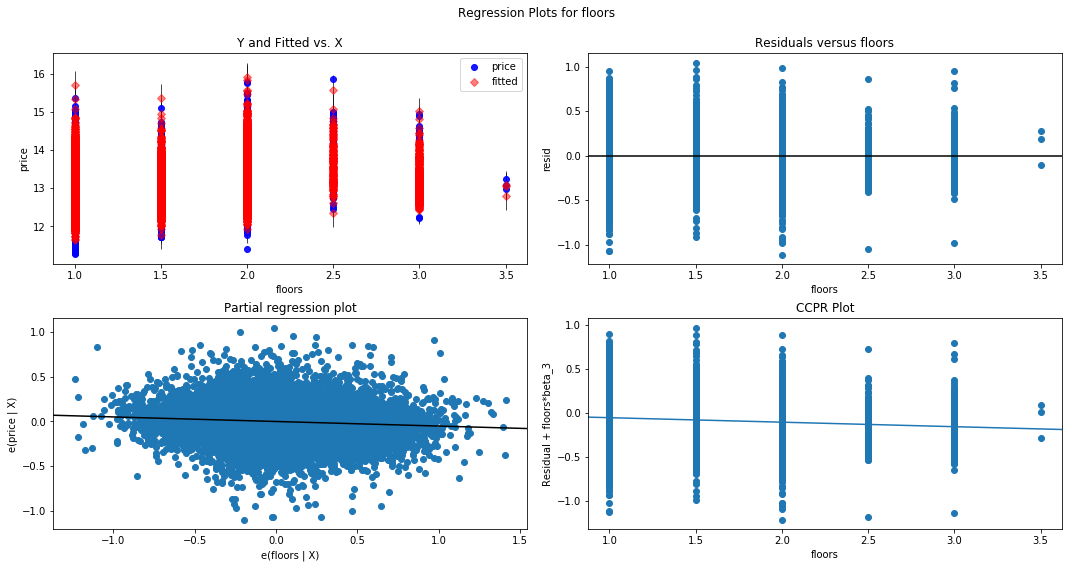

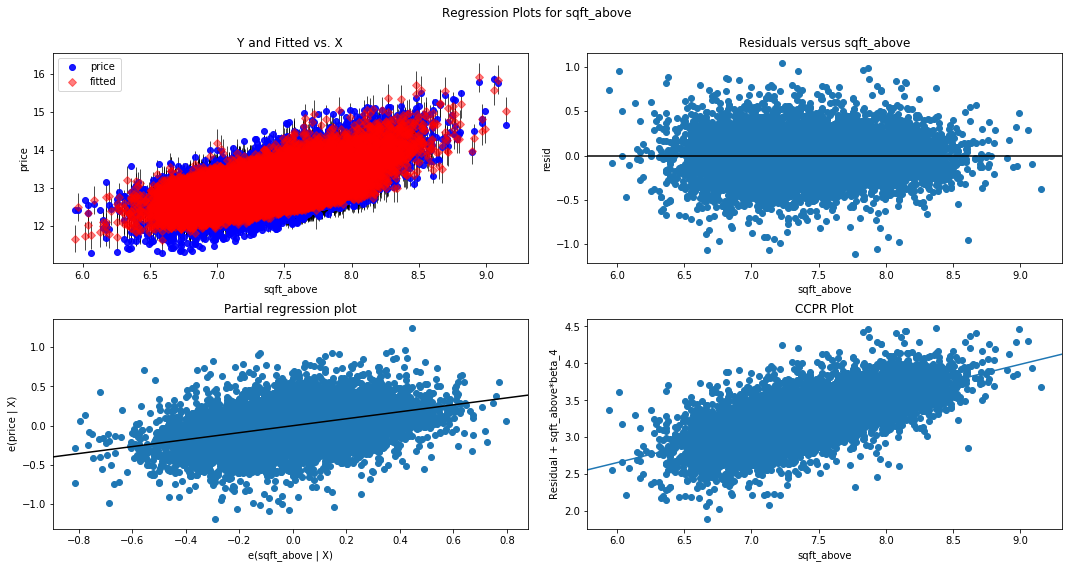

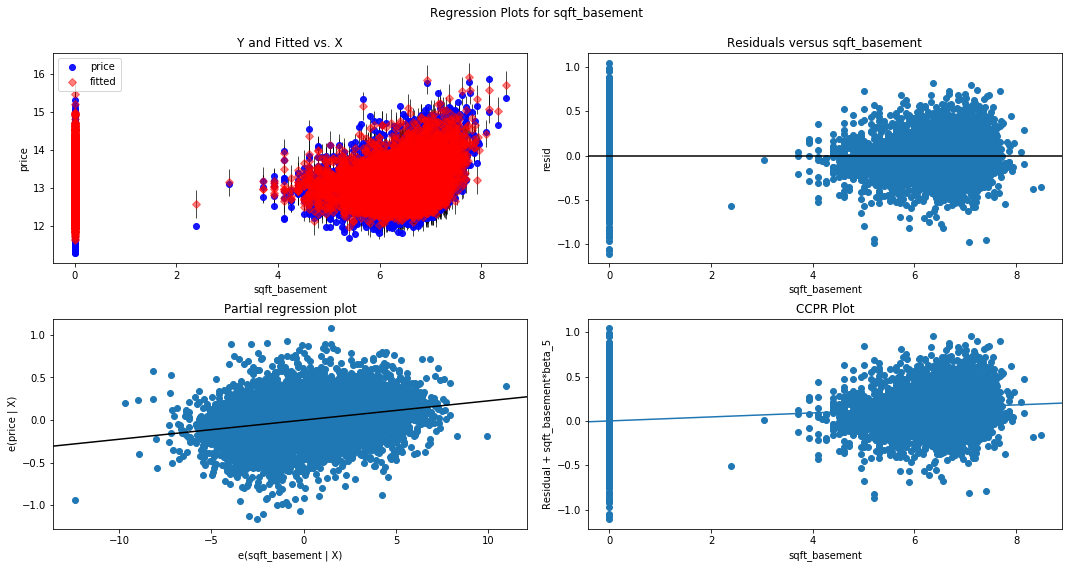

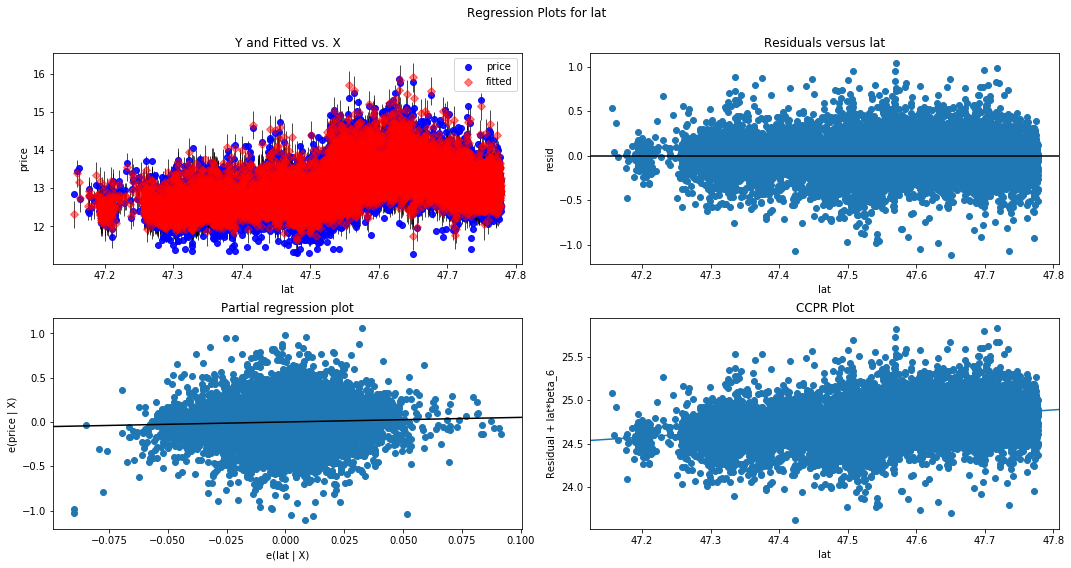

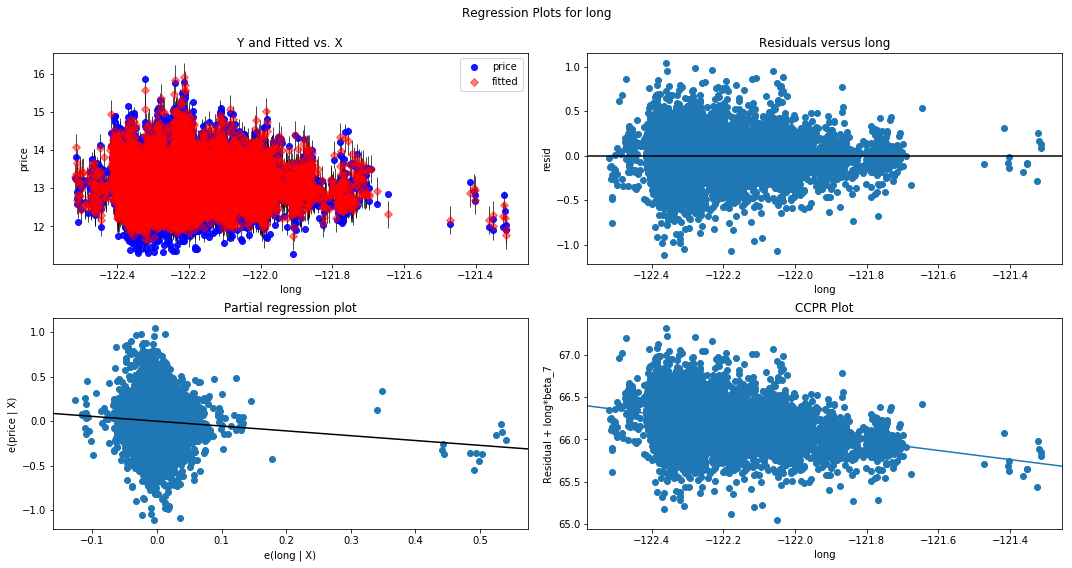

In [690]:
for col in ['bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'lat', 'long']:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.show()

### Step 4

- **Quantitative features:** ~~bedrooms~~, condition, bathrooms, sqft_lot, floors, sqft_above, sqft_basement, lat, long
- **Categorical features:** waterfront, ~~condition~~, grade, yr_renovated, yt_built, zipcode
- **Notes:** making condition quantitative
- **Observations:** no changes, I'll keep it as categorical

In [742]:
X_train = X_train.drop(['bedrooms', 'waterfront_0', 'grade_3', 'yr_renovated_1944', 'yr_built_1900', 'zipcode_98002'],
                       axis=1)

In [743]:
predictors = sm.add_constant(X_train)
model = sm.OLS(y_train, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     468.4
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        08:51:42   Log-Likelihood:                 4996.1
No. Observations:               17276   AIC:                            -9452.
Df Residuals:                   17006   BIC:                            -7358.
Df Model:                         269                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -84.5509      7.651    -11.051      0.000     -99.548     -69.554
bathrooms             0.0371      0.003     11.062      0.000       0.030       0.044
sqft_lot              0.0804      0.003     31.961      0.000       0.075       0.085
floors               -0.0510      0.005    -11.290      0.000      -0.060      -0.042
condition             0.0616      0.003     24.511      0.000       0.057       0.066
sqft_above            0.4430      0.007     61.159      0.000       0.429       0.457
sqft_basement         0.0222      0.001     36.888      0.000       0.021       0.023
lat                   0.6077      0.081      7.476      0.000       0.448       0.767
long                 -0.5378      0.057     -9.429      0.000      -0.650      -0.426
waterfront_1          0.6541      0.018     36.117      0.000       0.619       0.690
grade_10             -0.0501      0.185     -0.271      0.786      -0.412       0.312
grade_11              0.0858      0.185      0.464      0.643      -0.277       0.449
grade_12              0.2623      0.186      1.408      0.159      -0.103       0.627
grade_13              0.5144      0.193      2.670      0.008       0.137       0.892
grade_4              -0.5138      0.188     -2.734      0.006      -0.882      -0.145
grade_5              -0.5884      0.185     -3.185      0.001      -0.950      -0.226
grade_6              -0.4945      0.184     -2.682      0.007      -0.856      -0.133
grade_7              -0.3915      0.184     -2.123      0.034      -0.753      -0.030
grade_8              -0.2840      0.185     -1.539      0.124      -0.646       0.078
grade_9              -0.1537      0.185     -0.832      0.405      -0.516       0.208
yr_built_1901        -0.1014      0.043     -2.355      0.019      -0.186      -0.017
yr_built_1902        -0.0639      0.045     -1.414      0.157      -0.152       0.025
yr_built_1903        -0.0640      0.038     -1.685      0.092      -0.138       0.010
yr_built_1904        -0.0101      0.037     -0.273      0.785      -0.083       0.062
yr_built_1905         0.0272      0.034      0.808      0.419      -0.039       0.093
yr_built_1906         0.0028      0.032      0.088      0.930      -0.060       0.066
yr_built_1907         0.0573      0.036      1.592      0.111      -0.013       0.128
yr_built_1908        -0.0850      0.033     -2.599      0.009      -0.149      -0.021
yr_built_1909         0.0084      0.032      0.261      0.794      -0.054       0.071
yr_built_1910        -0.0005      0.030     -0.015      0.988      -0.060       0.059
yr_built_1911        -0.0033      0.035     -0.094      0.925      -0.072       0.065
yr_built_1912        -0.0458      0.033     -1.391      0.164      -0.110       0.019
yr_built_1913        -0.0073      0.036     -0.203      0.839      -0.077

C:\Data\Python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


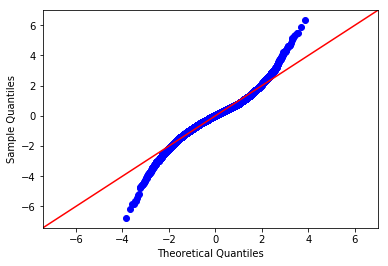

In [744]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

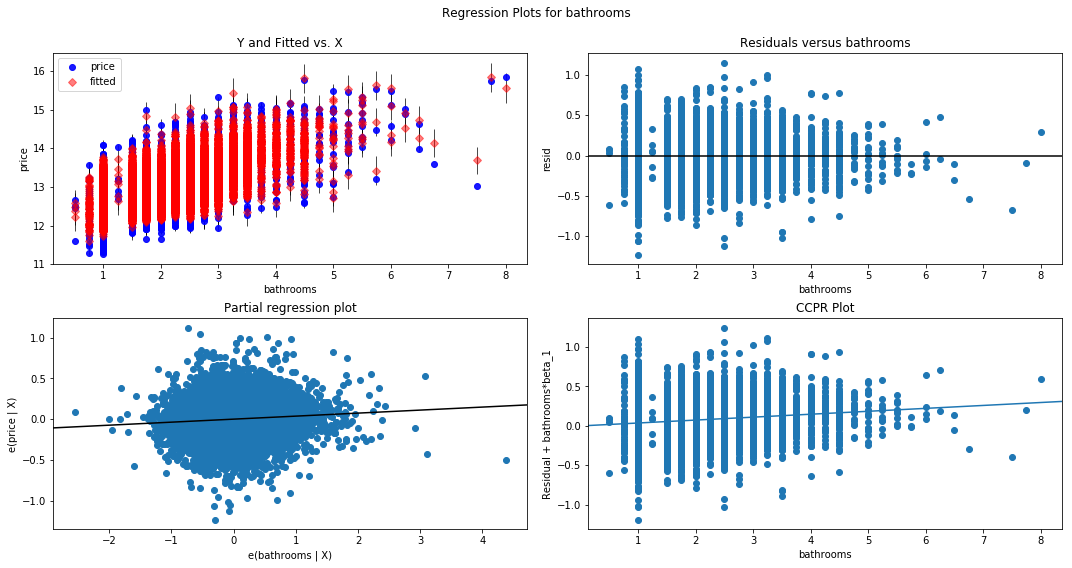

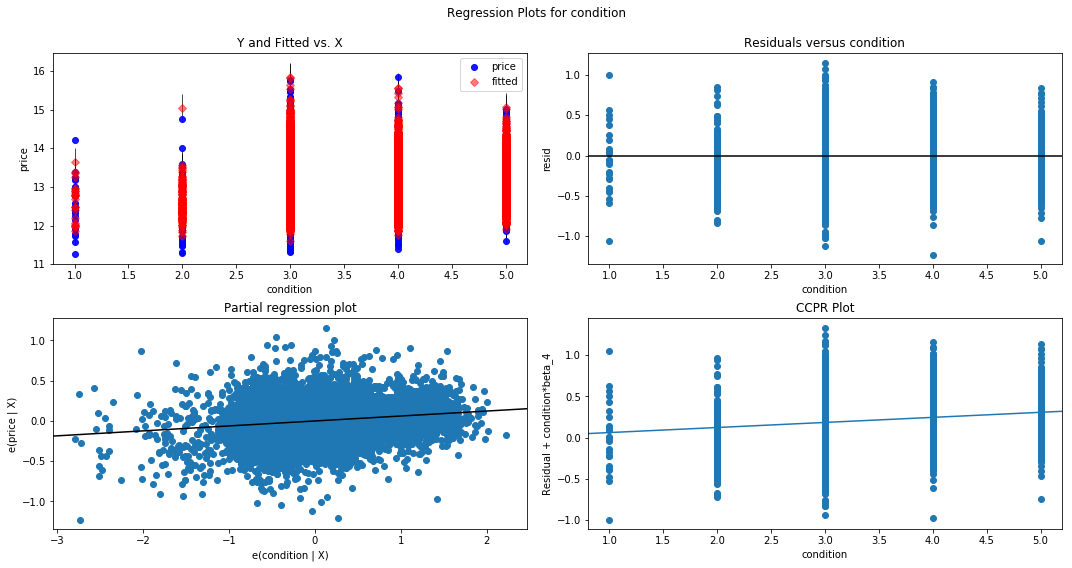

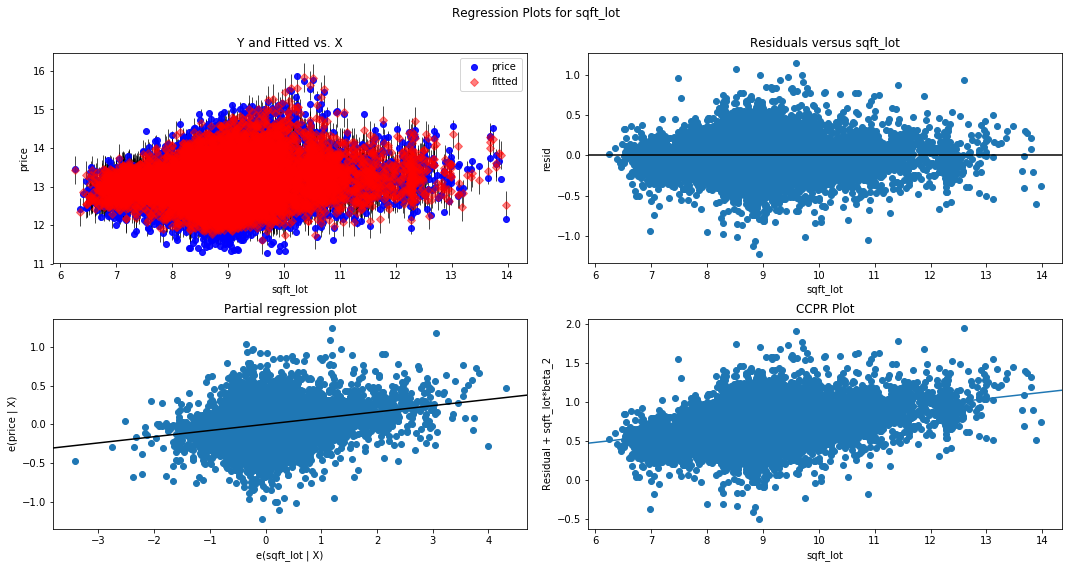

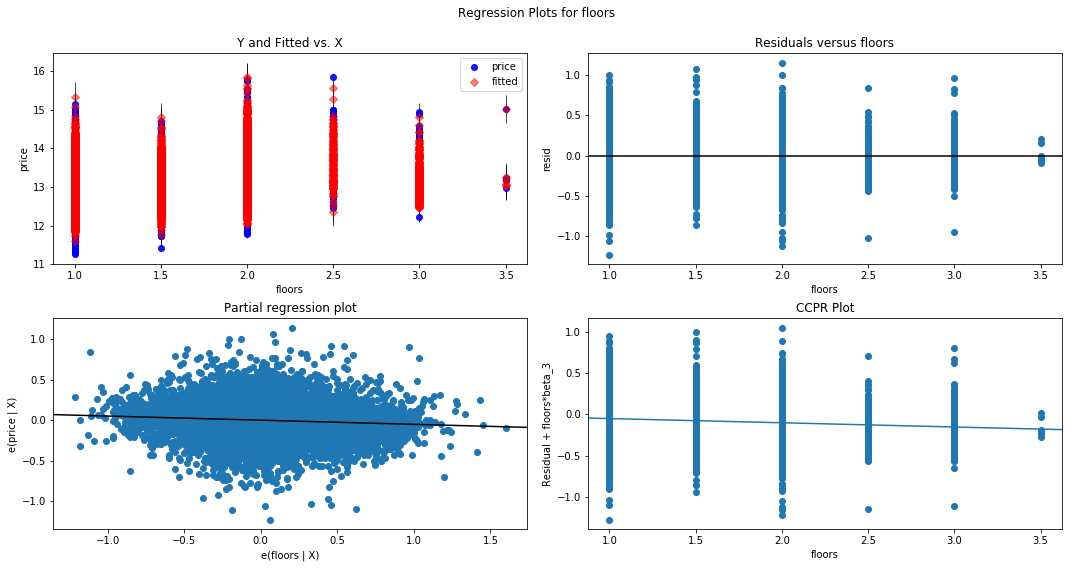

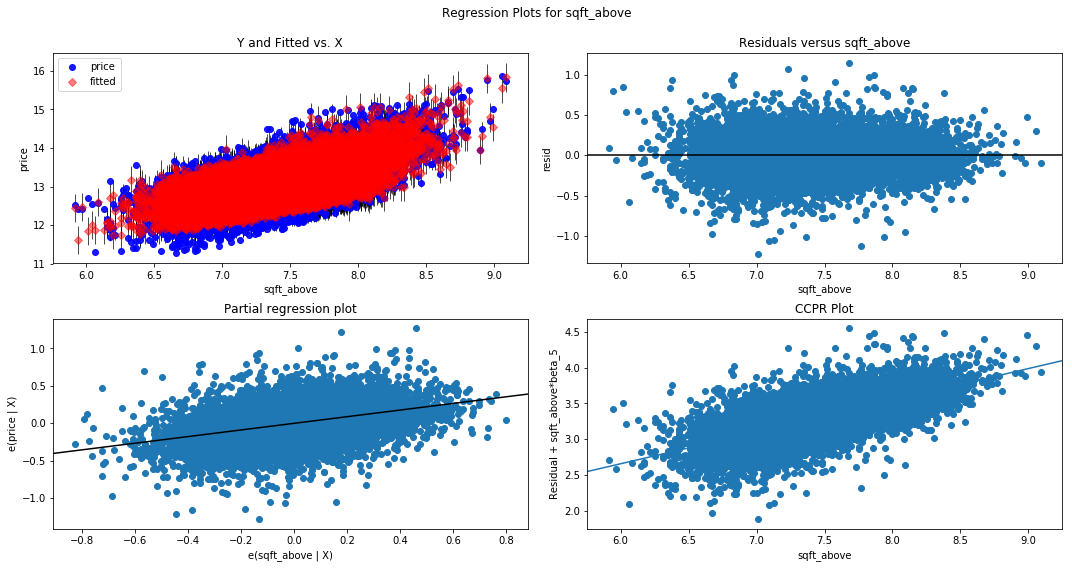

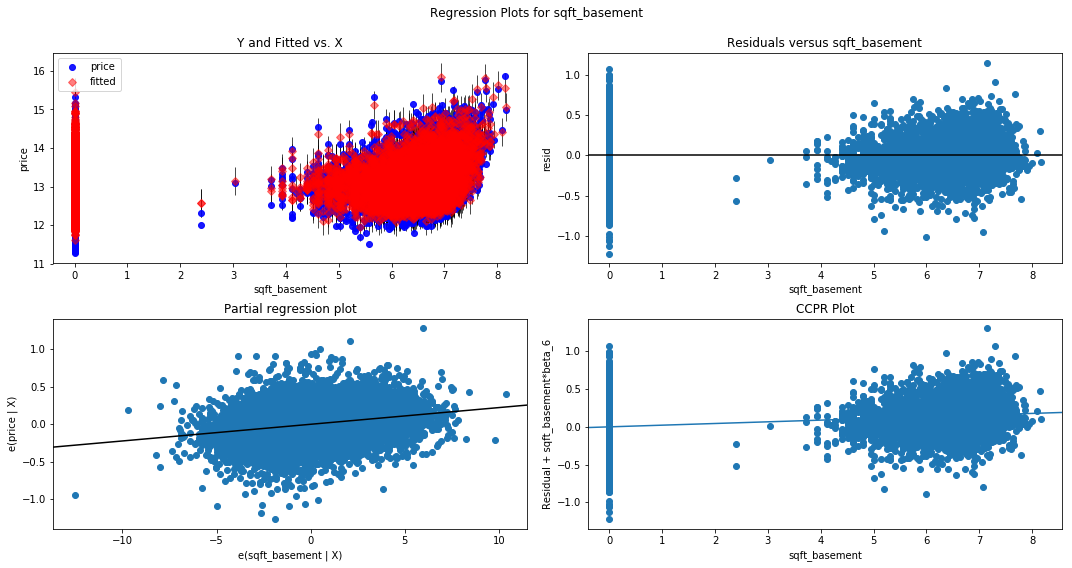

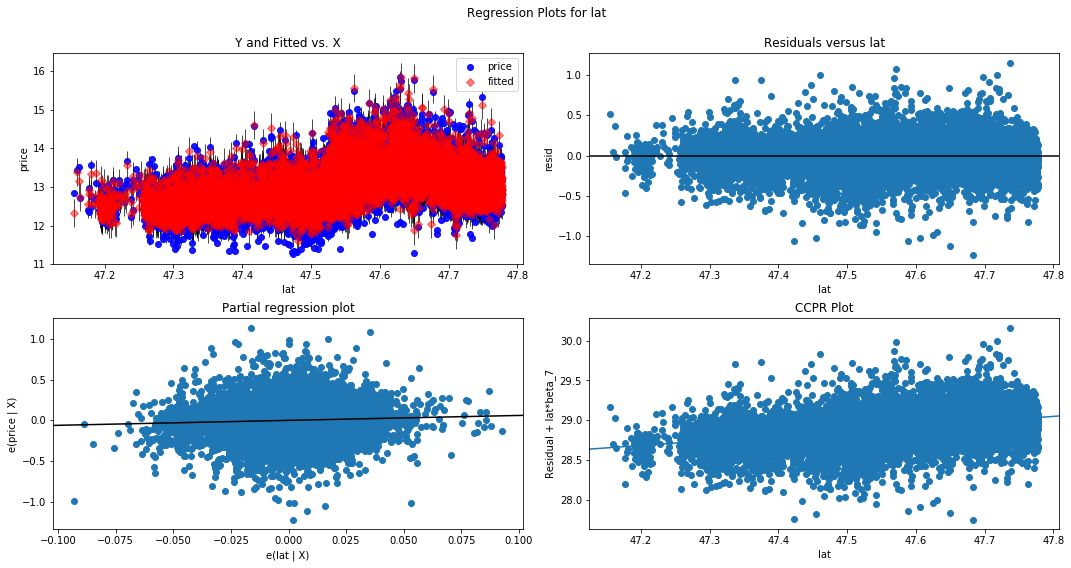

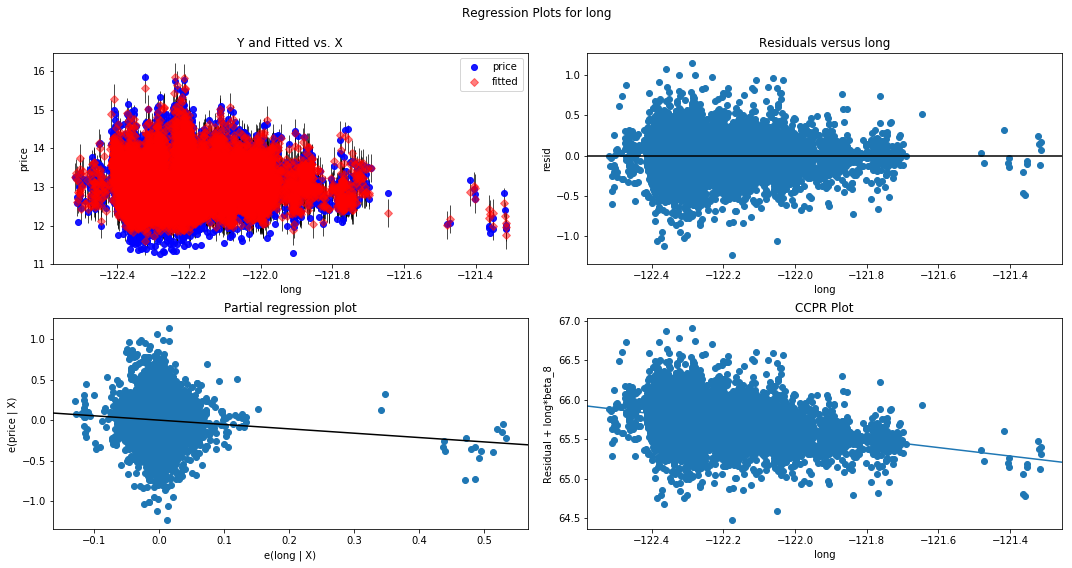

In [746]:
for col in ['bathrooms', 'condition', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'lat', 'long']:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.show()

### Take 5

#### Stepwise selection

In [840]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [705]:
result = stepwise_selection(X_train, y_train, verbose=True)
print('resulting features:')
print(result)

C:\Data\Python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Data\Python37\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Data\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Data\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Data\Python37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Add  grade_9                        with p-value 0.0
Add  lat                            with p-value 0.0
Add  sqft_above                     with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  zipcode_98004                  with p-value 8.83564e-222
Add  waterfront_1                   with p-value 6.91806e-198
Add  waterfront_0                   with p-value 0.0
Add  grade_10                       with p-value 7.54512e-158
Add  grade_11                       with p-value 1.16324e-155
Add  zipcode_98040                  with p-value 7.72507e-126
Add  grade_8                        with p-value 1.05986e-120
Add  grade_12                       with p-value 1.80165e-127
Add  zipcode_98155                  with p-value 1.79092e-113
Add  condition_3                    with p-value 1.10725e-113
Add  zipcode_98133                  with p-value 1.57132e-110
Add  zipcode_98112                  with p-value 1.29313e-105
Add  zipcode_98028                  with p-value 5.96

C:\Data\Python37\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Drop zipcode_98038                  with p-value 0.121053
Add  zipcode_98092                  with p-value 1.89972e-09
Add  zipcode_98033                  with p-value 6.75483e-11
Add  zipcode_98075                  with p-value 2.01024e-09
Drop zipcode_98074                  with p-value 0.675156
Add  zipcode_98007                  with p-value 2.33418e-09
Drop zipcode_98052                  with p-value 0.926605
Add  zipcode_98038                  with p-value 2.64451e-07
Drop zipcode_98022                  with p-value 0.725254
Add  zipcode_98166                  with p-value 3.57312e-11
Drop zipcode_98010                  with p-value 0.439533
Add  zipcode_98070                  with p-value 6.30569e-13
Add  zipcode_98022                  with p-value 6.73186e-06
Drop zipcode_98053                  with p-value 0.266957
Add  zipcode_98118                  with p-value 1.94776e-07
Add  zipcode_98010                  with p-value 2.77604e-08
Drop zipcode_98027                  with p

#### Model

- **Quantitative features:** ~~bedrooms~~, bathrooms, sqft_lot, floors, sqft_above, sqft_basement, lat, long
- **Categorical features:** waterfront, condition, grade, yr_renovated, yt_built, zipcode
- **Notes:** using variables from stepwise selection
- **Observations:** $R^2$ decreased, I wont use the stepwise selection

In [835]:
X_train = X_train.drop(['bedrooms', 'waterfront_0', 'condition_1', 'grade_3', 'yr_renovated_1944', 'yr_built_1900', 'zipcode_98002'],
                       axis=1)

In [836]:
stepwise_vars = ['grade_9', 'lat', 'sqft_above', 'sqft_basement', 'zipcode_98004', 'waterfront_1', 'waterfront_0', 'grade_10', 'grade_11', 'zipcode_98040', 'grade_8', 'grade_12', 'zipcode_98155', 'condition_3', 'zipcode_98133', 'zipcode_98112', 'zipcode_98028', 'zipcode_98019', 'zipcode_98039', 'zipcode_98072', 'zipcode_98011', 'zipcode_98034', 'zipcode_98077', 'zipcode_98168', 'zipcode_98125', 'zipcode_98014', 'zipcode_98177', 'sqft_lot', 'grade_7', 'grade_13', 'zipcode_98116', 'zipcode_98119', 'zipcode_98178', 'condition_5', 'condition_4', 'zipcode_98055', 'zipcode_98109', 'zipcode_98122', 'zipcode_98006', 'zipcode_98199', 'zipcode_98105', 'zipcode_98102', 'zipcode_98144', 'zipcode_98058', 'yr_renovated_nan', 'zipcode_98188', 'zipcode_98106', 'bathrooms', 'zipcode_98056', 'zipcode_98031', 'zipcode_98146', 'zipcode_98032', 'zipcode_98108', 'yr_built_2014', 'long', 'zipcode_98029', 'yr_built_2013', 'zipcode_98198', 'floors', 'zipcode_98030', 'zipcode_98023', 'zipcode_98107', 'zipcode_98103', 'zipcode_98042', 'yr_built_2012', 'zipcode_98059', 'zipcode_98148', 'yr_built_1926', 'bedrooms', 'yr_built_1978', 'yr_built_1979', 'yr_built_1966', 'zipcode_98126', 'yr_built_2011', 'zipcode_98005', 'zipcode_98115', 'yr_built_1959', 'grade_5', 'zipcode_98117', 'zipcode_98008', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98092', 'zipcode_98033', 'zipcode_98075', 'zipcode_98007', 'zipcode_98038', 'zipcode_98166', 'zipcode_98070', 'zipcode_98022', 'zipcode_98118', 'zipcode_98010', 'yr_renovated_1963', 'yr_built_1965', 'yr_built_1980', 'yr_built_1977', 'yr_renovated_1960', 'yr_built_1990', 'yr_renovated_1970', 'yr_built_1987', 'yr_built_1967', 'yr_built_1921', 'yr_built_1962', 'yr_built_1907', 'yr_built_1924', 'yr_built_2010', 'yr_built_1916', 'yr_built_1928', 'zipcode_98065', 'yr_built_1938', 'yr_built_1919', 'yr_built_2003', 'yr_built_1941', 'yr_renovated_2014', 'yr_built_1913', 'yr_built_1925', 'yr_renovated_1976', 'yr_built_1957', 'yr_built_1960', 'yr_built_1961', 'yr_built_1955', 'yr_built_1964', 'yr_built_1968', 'yr_built_1988', 'yr_renovated_2013', 'yr_built_2009', 'yr_built_2004', 'yr_renovated_2002', 'grade_3', 'yr_built_1974', 'yr_built_1972', 'yr_built_1976', 'yr_built_1958', 'yr_built_1954', 'yr_renovated_2010', 'yr_built_1953', 'yr_built_1969']

for col in X_train.columns:
    if col not in stepwise_vars:
        X_train.drop(col, axis=1, inplace=True)

In [837]:
predictors = sm.add_constant(X_train)
model = sm.OLS(y_train, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     897.5
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        09:18:30   Log-Likelihood:                 4438.4
No. Observations:               17276   AIC:                            -8609.
Df Residuals:                   17142   BIC:                            -7569.
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -108.7130      3.684    -29.506      0.000    -115.935    -101.491
bathrooms             0.0339      0.003     10.422      0.000       0.028       0.040
sqft_lot              0.0828      0.002     33.976      0.000       0.078       0.088
floors               -0.0442      0.004    -10.157      0.000      -0.053      -0.036
sqft_above            0.4412      0.007     61.194      0.000       0.427       0.455
sqft_basement         0.0234      0.001     38.539      0.000       0.022       0.025
lat                   1.2776      0.036     35.486      0.000       1.207       1.348
long                 -0.4639      0.026    -17.595      0.000      -0.516      -0.412
waterfront_1          0.6787      0.018     38.590      0.000       0.644       0.713
condition_3           0.1554      0.015     10.341      0.000       0.126       0.185
condition_4           0.2099      0.015     13.885      0.000       0.180       0.240
condition_5           0.2785      0.016     17.706      0.000       0.248       0.309
grade_10              0.4467      0.011     41.740      0.000       0.426       0.468
grade_11              0.5836      0.015     40.186      0.000       0.555       0.612
grade_12              0.7477      0.025     30.006      0.000       0.699       0.797
grade_13              0.9998      0.056     17.717      0.000       0.889       1.110
grade_5              -0.0704      0.014     -4.863      0.000      -0.099      -0.042
grade_7               0.0958      0.006     16.471      0.000       0.084       0.107
grade_8               0.2067      0.007     29.543      0.000       0.193       0.220
grade_9               0.3425      0.009     39.662      0.000       0.326       0.359
yr_built_1907         0.0740      0.027      2.724      0.006       0.021       0.127
yr_built_1913         0.0302      0.029      1.057      0.291      -0.026       0.086
yr_built_1916         0.0366      0.023      1.585      0.113      -0.009       0.082
yr_built_1919         0.0517      0.022      2.367      0.018       0.009       0.095
yr_built_1921         0.0622      0.024      2.620      0.009       0.016       0.109
yr_built_1924         0.0801      0.019      4.305      0.000       0.044       0.117
yr_built_1925         0.0406      0.016      2.469      0.014       0.008       0.073
yr_built_1926         0.0711      0.016      4.499      0.000       0.040       0.102
yr_built_1928         0.0405      0.019      2.172      0.030       0.004       0.077
yr_built_1938         0.0572      0.031      1.843      0.065      -0.004       0.118
yr_built_1941         0.0564      0.017      3.316      0.001       0.023       0.090
yr_built_1953        -0.0411      0.015     -2.826      0.005      -0.070      -0.013
yr_built_1954        -0.0505      0.013     -3.980      0.000      -0.075

C:\Data\Python37\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


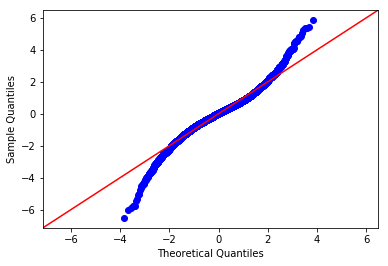

In [838]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

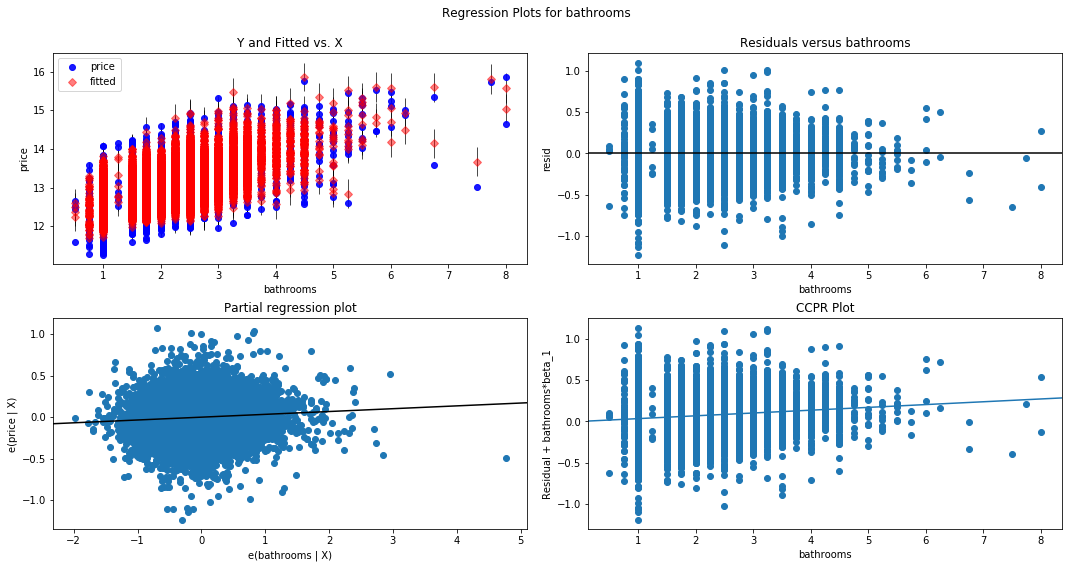

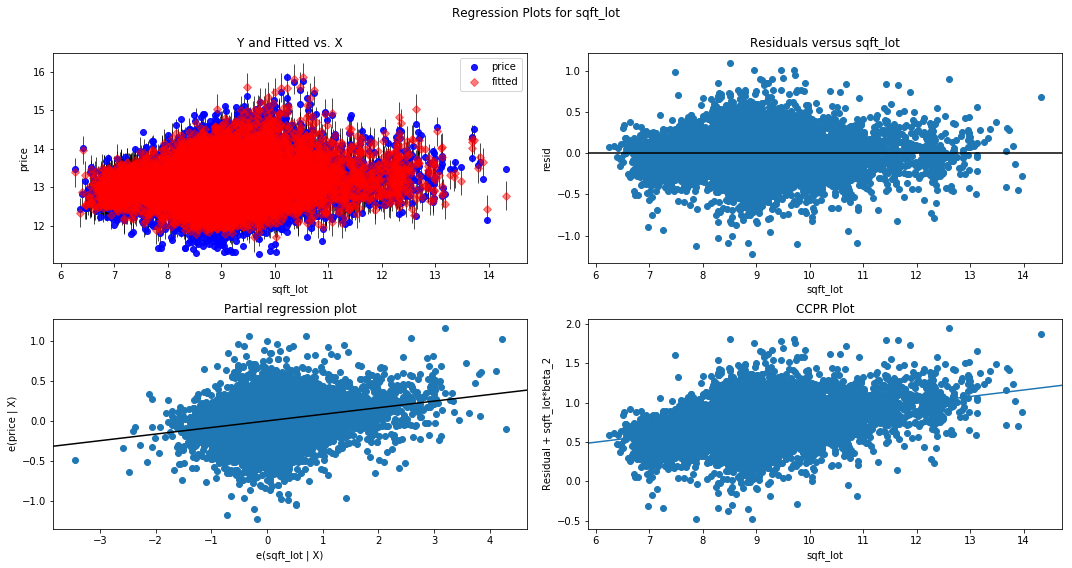

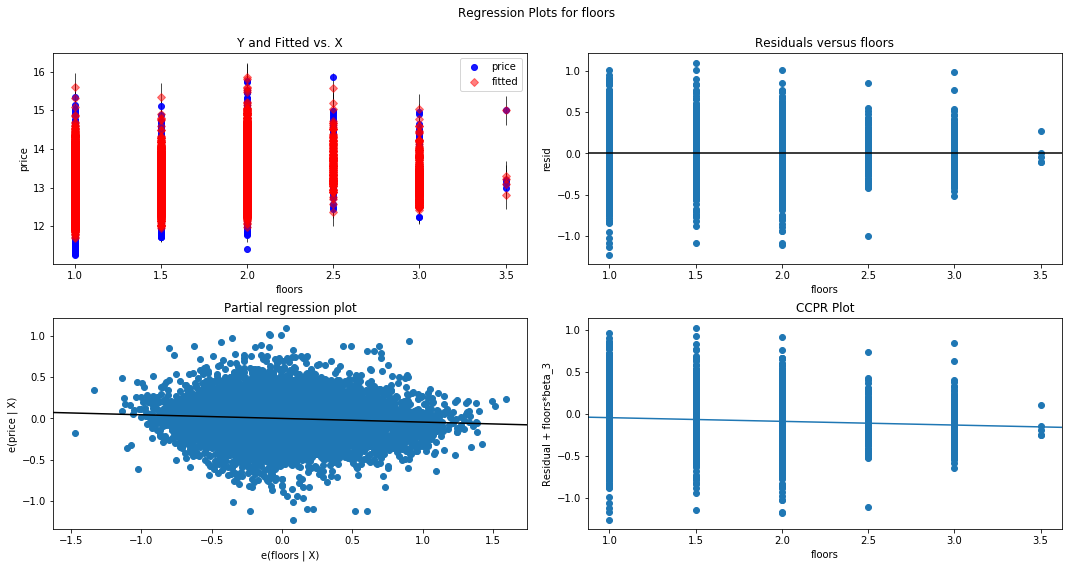

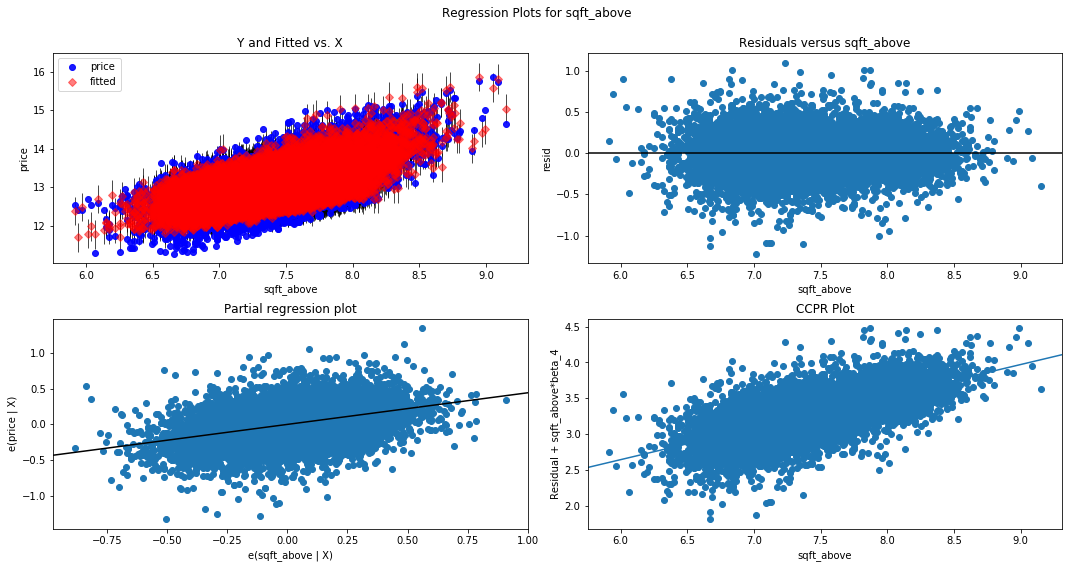

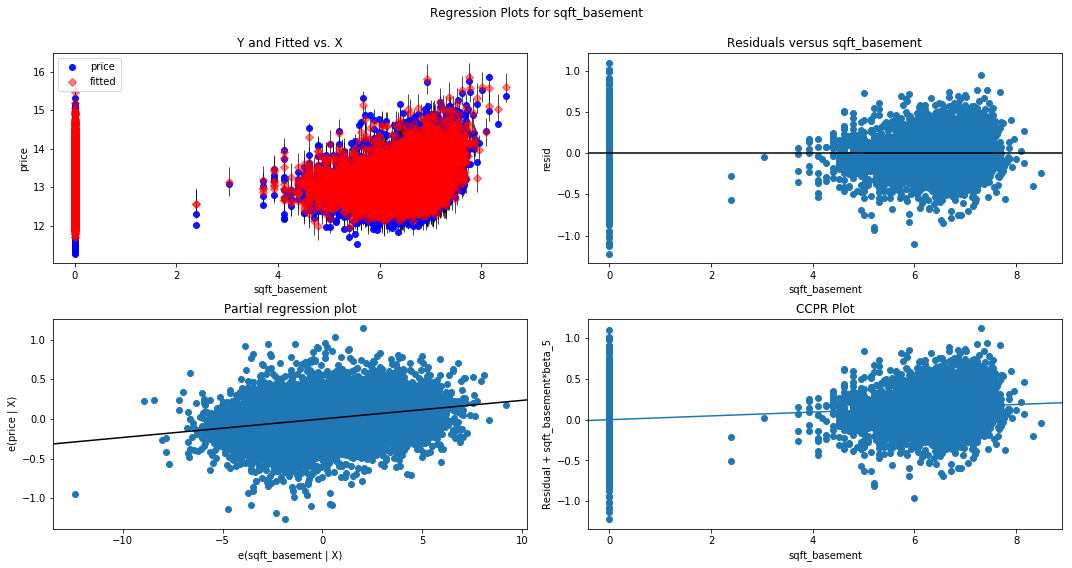

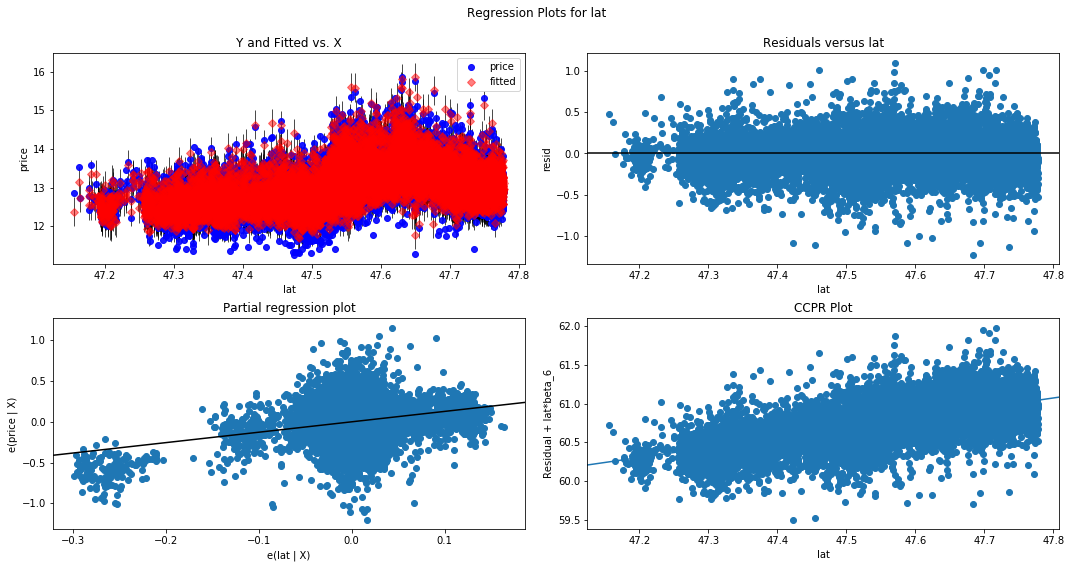

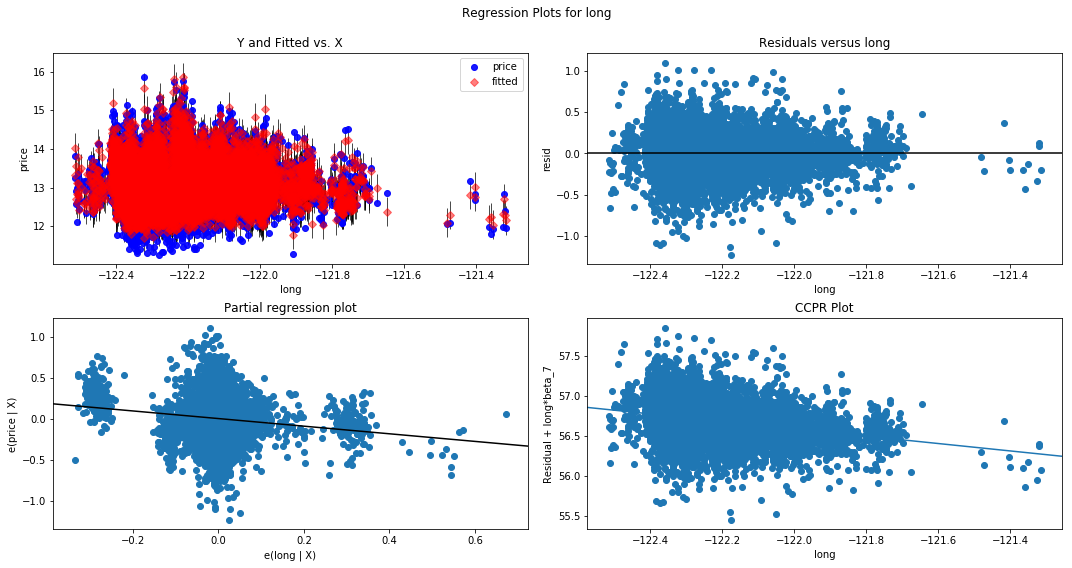

In [839]:
for col in ['bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'lat', 'long']:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.show()

## 4. Interpretation